<a href="https://colab.research.google.com/github/PhD-Gabriel-Caballero/RESSBIO/blob/main/S1_S2_TS_MOGPR_PhD_paper3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the required libraries**

In [ ]:
!pip install geemap
!pip install earthengine-api
!pip install --upgrade mogptk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11135 sha256=5b63b05472df6a6f0013f0c74229eb16227a2595a81d8103a328e0

In [ ]:
!pip install vam.whittaker
!pip install cython
!pip install modape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.6/335.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.9 MB/s eta 0:00:00
  Created wheel for pycksum: filename=pycksum-0.4.7-cp39-cp39-linux_x86_64.whl size=49644 sha256=89d8b3a5e81dc057bd7478fdb5a72ceabcc7554a2ab0d94caf21ce0a582d3199
  Stored in directory: /root/.cache/pip/wheels/7a/af/29/ec2efb9759d0917203535128ca45541bdb03c5d35c54f9a9f6
Successfully built pycksum
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully 

**Import libraries**

In [ ]:
import ee
import geemap
import mogptk
from ipyleaflet import *
from ipywidgets import Label
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import datetime
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import loadmat, savemat
from scipy.interpolate import Akima1DInterpolator
from scipy import signal
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.ticker as ticker

import vam.whittaker
from vam.whittaker import  ws2d, ws2dp, ws2doptv, lag1corr
import pandas as pd
from datetime import datetime, timedelta
import math
from shapely.geometry import box
import time

import scipy.io
import os
import pickle
import datetime
import numpy as np
import array
import matplotlib.pyplot as plt
import modape
from modape.whittaker import ws2d, ws2doptv, ws2doptvp
from modape.utils import DateHelper, fromjulian
#from scipy.stats.morestats import asarray

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Authenticate and initialize ee**

In [ ]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=sLe7qM6CUhPeqNN0MSI7Rv30w2Yq9yHn9LczbPSOTSk&tc=EBEptoGMkG9MkF6v4Cx-GDeLipHm4kiyiWOkkL7GnJw&cc=z0GUl1rzWZpAdqvq0NkFf3UeJeSpg0PnsHtFbP6tuPE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk73atcP_wn1tnKgWELwimZVxnZhw6cGBCUp99JC4378lsvxQ3E2Kuo

Successfully saved authorization token.


**Select the Area of Interest**

In [ ]:
Map = geemap.Map()
Map.default_style = {'cursor': 'crosshair'}
Map.add_basemap('SATELLITE')

# Center the map in the desired country
country = 'Argentina'
country_bounds = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filterMetadata('country_na', 'equals', country);
Map.centerObject(country_bounds,6)

Map

Map(center=[-34.687845828472675, -64.74963675588427], controls=(WidgetControl(options=['position', 'transparen…

**Retrieve the ROI from the map**

In [ ]:
feature = Map.draw_last_feature
roi = feature.geometry()

In [ ]:
#Roi to shapefile conversion

**Functions**

In [ ]:
# Masking function for water and cloud
def maskS2cloud_and_water(image):
  not_water = image.select('SCL').neq(6);
  not_cloud_low = image.select('SCL').neq(7);
  not_cloud_medium = image.select('SCL').neq(8);
  not_cloud_high = image.select('SCL').neq(9);
  not_cirrus = image.select('SCL').neq(10);

  qa = image.select('QA60');
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;
  mask = (qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0)).And(not_water).And(not_cloud_low)
          .And(not_cloud_medium).And(not_cloud_high).And(not_cirrus))
  return image.updateMask(mask).divide(currentModel['scaleFactor']).copyProperties(qa).set('system:time_start', qa.get('system:time_start'))

In [ ]:
#Function to mask clouds using the Sentinel-2 QA band

def maskS2clouds(image):
    qa = image.select('QA60');
    #Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;

    #Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0)and(qa.bitwiseAnd(cirrusBitMask).eq(0));
    #mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0));

    return image.updateMask(mask).divide(10000).copyProperties(image).set("system:time_start", image.get("system:time_start"));

In [ ]:

# Auxiliar function for mapping : (1..n) -> (B1..Bn)
def band_names(element):
  bandName = ee.String('B').cat(ee.Number(element).int().format())
  return bandName

def addDoy(image):
  doy = image.date().getRelative('day', 'year')
  doyBand = ee.Image.constant(doy).uint16().rename('doy')
  return image.addBands(doyBand)

In [ ]:
# Veg index GPR for mean prediction
def veg_index_GPR(image_orig):

  # Create List of Bands of Dimension n (Xtrain[n,n])
  XTrain_dim = currentModel['X_train'].length().get([0]).getInfo();

  band_sequence   = (ee.List.sequence(1, XTrain_dim)
                    .map(band_names));

  # Create a list of band names for flattening operation
  im_norm_ell2D_hypell = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).multiply(ee.Image(currentModel['hyp_ell'])).toArray().toArray(1);

  im_norm_ell2D = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).toArray().toArray(1);

  PtTPt  = im_norm_ell2D_hypell.matrixTranspose().matrixMultiply(im_norm_ell2D).arrayProject([0]).multiply(-0.5);

  PtTDX  = ee.Image(currentModel['X_train']).matrixMultiply(im_norm_ell2D_hypell).arrayProject([0]).arrayFlatten([band_sequence]);

  arg1   = PtTPt.exp().multiply(currentModel['hyp_sig']);

  k_star = PtTDX.subtract(ee.Image(currentModel['XDX_pre_calc']).multiply(0.5)).exp().toArray();

  mean_pred = k_star.arrayDotProduct(ee.Image(currentModel['alpha_coefficients']).toArray()).multiply(arg1);

  mean_pred = mean_pred.toArray(1).arrayProject([0]).arrayFlatten([[currentModel['veg_index']]]);

  mean_pred = mean_pred.add(currentModel['mean_model']);

  # Mask values equal or less than 0
  mean_pred = mean_pred.updateMask(mean_pred.gt(0))

  image_orig = image_orig.addBands(mean_pred)

  return image_orig.select(currentModel['veg_index'])

In [ ]:
def mask_gt(image):
  veg_index_mask = image.select(currentModel['veg_index']).gt(0).rename('veg_index_mask')
  return image.addBands(veg_index_mask).select('veg_index_mask')

def addVariables(image):
  date = ee.Date(image.get("system:time_start"))
  years = date.difference(ee.Date('1970-01-01'),'days')
  return image.addBands(ee.Image(years).rename('t').float())

In [ ]:
def extract_ts(roi, col, band):
    """ Constructs a dataframe with the time series for the ROI with the image
        collection.

        Parameters
        ----------
        roi : ee.Geometry, Region of interest

        col : ee.ImageCollection

        band : string, Name of the band to retrieve

        Returns
        ------
        A pandas dataframe

    """

    # Auxiliar function to replace the null values with custom value(-9999)
    # so we do not lose the masked values.
    def set_NAN(key,val):
        return ee.List([val, -9999]).reduce(ee.Reducer.firstNonNull())

    # Retrieve the mean value of the band in the roi and the date of the image
    def get_ts(image):
        stat = image.select([band]).reduceRegion(
            reducer = ee.Reducer.mean(),
            geometry= roi,
            scale= 20,
            bestEffort= True
        )
        stat = stat.map(set_NAN)
        return ee.Feature(roi, stat).set({'millis': image.date().millis()})

    # List of features containing the reduced value and the date
    ts = col.map(get_ts)

    # Lists of values and dates
    y = ts.aggregate_array(band).getInfo()
    dates_ms = ts.aggregate_array('millis').getInfo() # Date in ms
    x = [datetime.fromtimestamp(d//1000.0) for d in dates_ms] # Formatted date

    # Dictionary that will feed the pandas dataframe
    dict = {'date': x, band: y}
    # Contruct the df and replace the custom NaN values(-9999) with np.nan
    df = pd.DataFrame(dict).replace(-9999, np.nan)
    return df

In [ ]:
# Function to calculate and add an NDVI band
def addNDVIS2(image):
    ndvi = image.addBands(image.normalizedDifference(['NIR', 'Red'])).rename('Red','NIR','QA60','NDVI').copyProperties(image,['system:time_start']);
    return image.addBands(ndvi)

In [ ]:
# Function to calculate and add an Ficocianina band
#ficocianina_S2 = #e^2.6151*(R740/R665)–3.6369;
#R740 nm = B6
#R665 nm = B4 .substract(-3.6369))Image.exp()

def addFICOS2(image):
    #fico = (((image.select('B6').divide(image.select('B4'))).exp()).add(-30.6369)).rename('fico')
    fico = (((image.select('B6').divide(image.select('B4')).multiply(2.6151)).add(3.6369))).exp().rename('fico')

    return image.addBands(fico)

**Import GPR models**

In [ ]:
!cp /content/drive/MyDrive/BOA_LAIGreen.py .
!cp /content/drive/MyDrive/BOA_LAIBrown.py .
!cp /content/drive/MyDrive/S2_GPR_MLRAmodel_VWC_13122022.py .
!cp /content/drive/MyDrive/BOAModelsV2.py .

import BOAModelsV2
import S2_GPR_MLRAmodel_VWC_13122022
import BOA_LAIGreen
import BOA_LAIBrown

In [ ]:
#GPR retrieval model configuration
#currentVegIndex ='VWC'
#currentModel = S2_GPR_MLRAmodel_VWC_13122022.models[currentVegIndex]

currentVegIndex ='LAI'
currentModel = BOAModelsV2.models[currentVegIndex]

#currentVegIndex ='LAIGreen'
#currentModel = BOA_LAIGreen.models[currentVegIndex]

**Sentinel 2 imagery retrieval and BV time series calculations**

Dates of interest and acquisitions configuration parameters

In [ ]:
# Configuration Parameters
start_date = '2018-12-01'
end_date = '2021-01-11'
S2_CPP = 5 # CLOUDY_PIXEL_PERCENTAGE
S1_RON = 68 # Relative Orbit Number (S1A = Path68 and Path141, S1B = Path68 (ROI = VBRC-EEHA))
S1_Platform = 'A'

Create the initial image collection with the spectral bands

In [ ]:
# Retrieving Sentinel 2 imagery
print('SENTINEL-2 time series being retrieved')
S2collection_ini = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
                   .filterBounds(roi)\
                   .filterDate(start_date,end_date)\
                   .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', S2_CPP)\
                   .map(maskS2clouds)\
                   .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12'])

SENTINEL-2 time series being retrieved


In [ ]:
print('SENTINEL2 time series being retrieved')
dataset_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterDate(start_date, end_date).filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', S2_CPP).filterBounds(roi).select(['B4','B8','QA60'],['Red','NIR','QA60']).map(maskS2clouds)#;

SENTINEL2 time series being retrieved


Create the predicted mean image collection

In [ ]:
S2_GPR_collection =  S2collection_ini.map(veg_index_GPR).select(currentModel['veg_index'])
S2_GPR_collection

In [ ]:
# Add NDVI band to image collection
NDVI_collection = S2collection_ini.map(addNDVIS2).select('NDVI')
NDVI_collection


In [ ]:
# Add FICO band to image collection
FICO_collection = S2collection_ini.map(addFICOS2).select('fico')
FICO_collection

S2 image collection to a numpy array conversion

In [ ]:
S2_GPR_image= S2_GPR_collection.toBands().unmask(0);
#S2_GPR_image = NDVI_collection.toBands().unmask(0);
#S2_GPR_image = FICO_collection.toBands().unmask(0);
S2_GPR_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_image.toArray(), region=roi, default_value=None)
print('S2 ROI Dimension')
print(S2_GPR_image_nparray.shape)

S2 ROI Dimension
(9, 8, 43)


S2 dates extraction

In [ ]:
# Creating labels - Multitemporal plotting
labels_S2 = S2collection_ini.aggregate_array("system:index").getInfo()
#labels_S2 = NDVI_collection.aggregate_array("system:index").getInfo()

# Dates S2
Dates_S2 = []
for i in labels_S2:
    Dates_S2.append(datetime.datetime.strptime(i.split('_')[0].split('T')[0], '%Y%m%d').date())
Dates_S2.sort()

#datetime.datetime.strptime(date, "%Y-%m-%d")
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

In [ ]:
Dates_S2

[datetime.date(2022, 12, 5),
 datetime.date(2022, 12, 15),
 datetime.date(2022, 12, 20),
 datetime.date(2022, 12, 30),
 datetime.date(2023, 1, 4),
 datetime.date(2023, 1, 14),
 datetime.date(2023, 1, 19),
 datetime.date(2023, 2, 18),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 5),
 datetime.date(2023, 3, 10),
 datetime.date(2023, 3, 15),
 datetime.date(2023, 4, 9)]

S2 time-series plotting

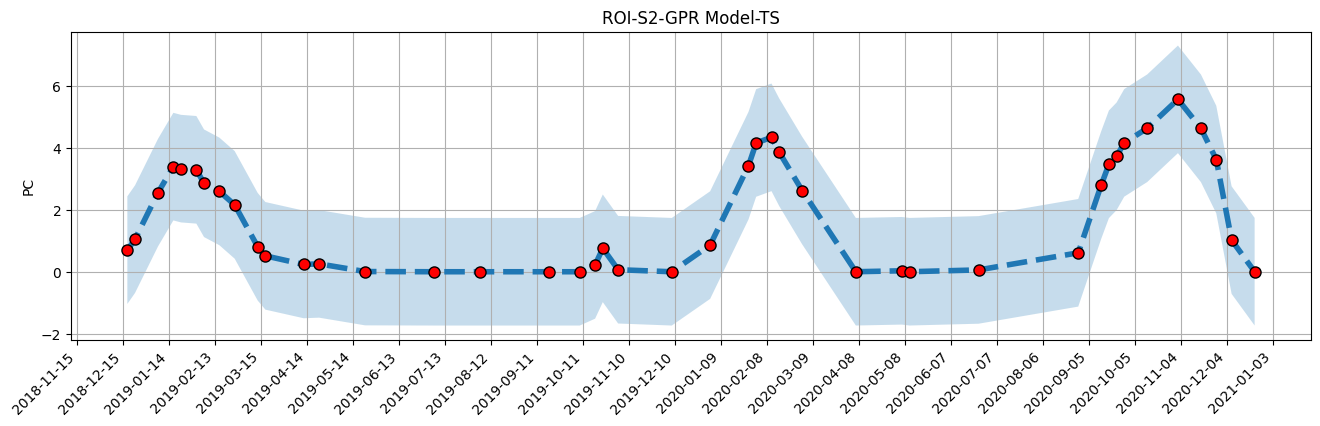

Temporal Series Length 43
Sentinel-2 Optic time series


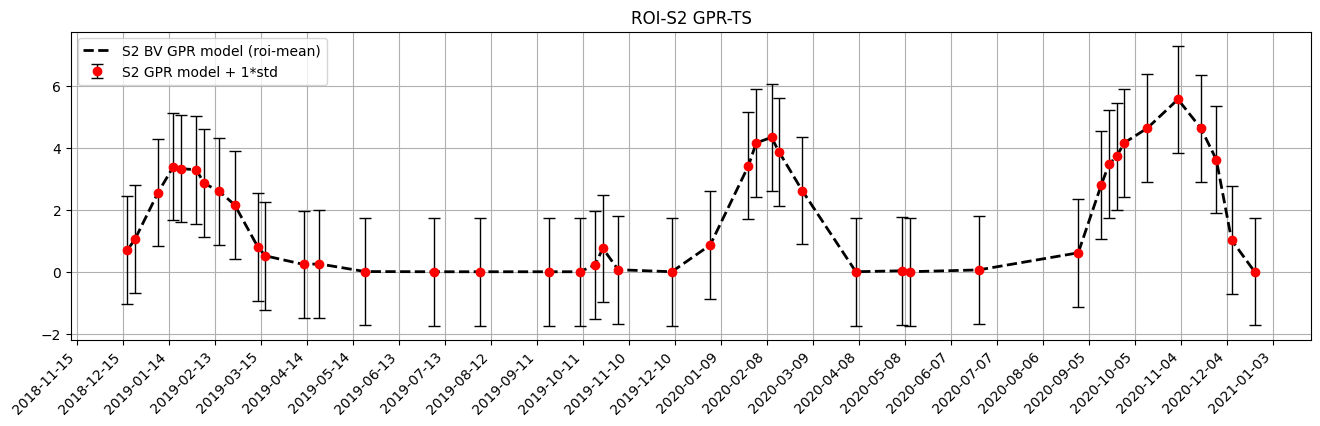

In [ ]:
# Parcel mean calculations
S2_GPR_parcel_mean = np.mean(S2_GPR_image_nparray, axis = 0)
S2_GPR_parcel_mean = np.mean(S2_GPR_parcel_mean, axis = 0)
S2_GPR_parcel_std = np.std(S2_GPR_parcel_mean, axis=0)

# Sentinel 2 GPR model time series plotting
plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_GPR_parcel_mean,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_GPR_parcel_mean-S2_GPR_parcel_std,S2_GPR_parcel_mean+S2_GPR_parcel_std ,alpha=0.25)
plt.title('ROI-S2-GPR Model-TS')
#plt.legend(['S2 BV GPR model (roi-mean)'])
plt.grid(1)
#plt.ylabel(currentVegIndex)
#plt.ylabel('VWC [g m\N{SUPERSCRIPT TWO}]')
plt.ylabel('PC')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

print('Temporal Series Length', S2_GPR_parcel_mean.shape[0])

#-------------------------------
print('Sentinel-2 Optic time series')

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_GPR_parcel_mean,'--k', lw=2)
plt.errorbar(Dates_S2,S2_GPR_parcel_mean, fmt='ro', label="data",yerr=S2_GPR_parcel_std, ecolor='black', lw=1,capsize=4)
plt.title('ROI-S2 GPR-TS')
plt.legend(['S2 BV GPR model (roi-mean)','S2 GPR model + 1*std'])
plt.grid(1)
#plt.ylabel(currentVegIndex)
#plt.ylabel('VWC [g m\N{SUPERSCRIPT TWO}]')
plt.xticks(rotation=45, ha='right')
plt.show()


**Sentinel 1 imagery retrieval and RVI time series calculations**

In [ ]:
# Function to calculate and add an RVI band
# RVI = (4*VH)/(VV+VH)
# CR = VH/VV

def addRVI(image):
    #rvi = image.select('VH').subtract(image.select('VV')).rename('RVI');
    #rvi = image.addBands(image.normalizedDifference(['VH', 'VV'])).rename('VH','VV','RVI').copyProperties(image,['system:time_start']);

    rvi = (image.select('VH').divide(image.select('VH').add(image.select('VV'))).multiply(4)).rename('RVI');
    return image.addBands(rvi)

In [ ]:
#Function to convert from dB
def toNatural(img):
    return ee.Image(10.0).pow(img.select(0).divide(10.0))

#Function to convert to dB
def toDB(img):
    return ee.Image(img).log10().multiply(10.0)

In [ ]:
#Apllying a Refined Lee Speckle filter as coded in the SNAP 3.0 S1TBX:
#https://github.com/senbox-org/s1tbx/blob/master/s1tbx-op-sar-processing/src/main/java/org/esa/s1tbx/sar/gpf/filtering/SpeckleFilters/RefinedLee.java
#Adapted by Guido Lemoine

def RefinedLee(img):
    #img must be in natural units, i.e. not in dB!
    #Set up 3x3 kernels

    #convert to natural.. do not apply function on dB!
    #myimg = toNatural(img);
    myimg = img;

    weights3 = ee.List.repeat(ee.List.repeat(1,3),3);
    kernel3 = ee.Kernel.fixed(3,3, weights3, 1, 1, False);

    mean3 = myimg.reduceNeighborhood(ee.Reducer.mean(), kernel3);
    variance3 = myimg.reduceNeighborhood(ee.Reducer.variance(), kernel3);

    #Use a sample of the 3x3 windows inside a 7x7 windows to determine gradients and directions
    sample_weights = ee.List([[0,0,0,0,0,0,0], [0,1,0,1,0,1,0],[0,0,0,0,0,0,0], [0,1,0,1,0,1,0], [0,0,0,0,0,0,0], [0,1,0,1,0,1,0],[0,0,0,0,0,0,0]]);

    sample_kernel = ee.Kernel.fixed(7,7, sample_weights, 3,3, False);

    #Calculate mean and variance for the sampled windows and store as 9 bands
    sample_mean = mean3.neighborhoodToBands(sample_kernel);
    sample_var = variance3.neighborhoodToBands(sample_kernel);

    #Determine the 4 gradients for the sampled windows
    gradients = sample_mean.select(1).subtract(sample_mean.select(7)).abs();
    gradients = gradients.addBands(sample_mean.select(6).subtract(sample_mean.select(2)).abs());
    gradients = gradients.addBands(sample_mean.select(3).subtract(sample_mean.select(5)).abs());
    gradients = gradients.addBands(sample_mean.select(0).subtract(sample_mean.select(8)).abs());

    #And find the maximum gradient amongst gradient bands
    max_gradient = gradients.reduce(ee.Reducer.max());

    #Create a mask for band pixels that are the maximum gradient
    gradmask = gradients.eq(max_gradient);

    #duplicate gradmask bands: each gradient represents 2 directions
    gradmask = gradmask.addBands(gradmask);

    #Determine the 8 directions
    directions = sample_mean.select(1).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(7))).multiply(1);
    directions = directions.addBands(sample_mean.select(6).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(2))).multiply(2));
    directions = directions.addBands(sample_mean.select(3).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(5))).multiply(3));
    directions = directions.addBands(sample_mean.select(0).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(8))).multiply(4));

    #The next 4 are the not() of the previous 4
    directions = directions.addBands(directions.select(0).Not().multiply(5));
    directions = directions.addBands(directions.select(1).Not().multiply(6));
    directions = directions.addBands(directions.select(2).Not().multiply(7));
    directions = directions.addBands(directions.select(3).Not().multiply(8));

    #Mask all values that are not 1-8
    directions = directions.updateMask(gradmask);

    #"collapse" the stack into a singe band image (due to masking, each pixel has just one value (1-8) in it's directional band, and is otherwise masked)
    directions = directions.reduce(ee.Reducer.sum());

    sample_stats = sample_var.divide(sample_mean.multiply(sample_mean));

    #Calculate localNoiseVariance
    sigmaV = sample_stats.toArray().arraySort().arraySlice(0,0,5).arrayReduce(ee.Reducer.mean(), [0]);

    #Set up the 7*7 kernels for directional statistics
    rect_weights = ee.List.repeat(ee.List.repeat(0,7),3).cat(ee.List.repeat(ee.List.repeat(1,7),4));

    diag_weights = ee.List([[1,0,0,0,0,0,0], [1,1,0,0,0,0,0], [1,1,1,0,0,0,0],
    [1,1,1,1,0,0,0], [1,1,1,1,1,0,0], [1,1,1,1,1,1,0], [1,1,1,1,1,1,1]]);

    rect_kernel = ee.Kernel.fixed(7,7, rect_weights, 3, 3, False);
    diag_kernel = ee.Kernel.fixed(7,7, diag_weights, 3, 3, False);

    #Create stacks for mean and variance using the original kernels. Mask with relevant direction.
    dir_mean = myimg.reduceNeighborhood(ee.Reducer.mean(), rect_kernel).updateMask(directions.eq(1));
    dir_var = myimg.reduceNeighborhood(ee.Reducer.variance(), rect_kernel).updateMask(directions.eq(1));

    dir_mean = dir_mean.addBands(myimg.reduceNeighborhood(ee.Reducer.mean(), diag_kernel).updateMask(directions.eq(2)));
    dir_var = dir_var.addBands(myimg.reduceNeighborhood(ee.Reducer.variance(), diag_kernel).updateMask(directions.eq(2)));

    #and add the bands for rotated kernels
    for i in range(1,3):   #(i=1; i<4; i++)
        dir_mean = dir_mean.addBands(myimg.reduceNeighborhood(ee.Reducer.mean(), rect_kernel.rotate(i)).updateMask(directions.eq(2*i+1)));
        dir_var = dir_var.addBands(myimg.reduceNeighborhood(ee.Reducer.variance(), rect_kernel.rotate(i)).updateMask(directions.eq(2*i+1)));
        dir_mean = dir_mean.addBands(myimg.reduceNeighborhood(ee.Reducer.mean(), diag_kernel.rotate(i)).updateMask(directions.eq(2*i+2)));
        dir_var = dir_var.addBands(myimg.reduceNeighborhood(ee.Reducer.variance(), diag_kernel.rotate(i)).updateMask(directions.eq(2*i+2)));


    #"collapse" the stack into a single band image (due to masking, each pixel has just one value in it's directional band, and is otherwise masked)
    dir_mean = dir_mean.reduce(ee.Reducer.sum());
    dir_var = dir_var.reduce(ee.Reducer.sum());

    #A finally generate the filtered value
    X = dir_var.subtract(dir_mean.multiply(dir_mean).multiply(sigmaV)).divide(sigmaV.add(1.0));
    b = X.divide(dir_var);

    result = dir_mean.add(b.multiply(myimg.subtract(dir_mean)));
    #return(result);
    #return(img.addBands(ee.Image(toDB(result.arrayGet(0))).rename("filter")));
    return(img.addBands(ee.Image(result.arrayGet(0)).rename("filter")));
    #return(img.addBands(ee.Image(toNatural(result.arrayGet(0))).rename("filter")));

Create the initial image collection with the polarization bands

In [ ]:
# Retrieving Sentinel 1 imagery
print('SENTINEL1 time series being retrieved')
S1collection_ini = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT')\
                     .filterBounds(roi)\
                     .filterDate(start_date, end_date)\
                     .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
                     .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))\
                     .filter(ee.Filter.eq('instrumentMode', 'IW'))\
                     .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
                     .filter(ee.Filter.eq('resolution','H'))\
                     .select('VH','VV')\
                    #.filter(ee.Filter.eq('platform_number','A'))\
                    #.filter(ee.Filter.eq('relativeOrbitNumber_start',S1_RON))\

# Sort the dataset S1
S1collection_ini = S1collection_ini.sort('GRD_Post_Processing_start');

SENTINEL1 time series being retrieved


In [ ]:
# Speckle filtering
S1collection_ini_VH  = ee.ImageCollection(S1collection_ini.select(["VH"]))
S1collection_ini_spk_VH = S1collection_ini_VH.map(RefinedLee).select("filter")

S1collection_ini_VV  = ee.ImageCollection(S1collection_ini.select(["VV"]))
S1collection_ini_spk_VV = S1collection_ini_VV.map(RefinedLee).select("filter")

image_S1_VH_spk = S1collection_ini_spk_VH.toBands().unmask(0);
image_S1_VV_spk = S1collection_ini_spk_VV.toBands().unmask(0);

image_S1_VH = S1collection_ini_VH.toBands().unmask(0);
image_S1_VV = S1collection_ini_VV.toBands().unmask(0);

In [ ]:
visVH = { 'min': 0,
  'max': 5,
  'palette': [
    #'#FFFFFF','#CE7E45','#DF923D','#F1B555','#FCD163','#99B718', '#74A901','#66A000','#529400','#3E8601','#207401','#056201','#004C00','#023B01','#012E01','#011D01', '#011301'
     '#31a354','#fee391','#fec44f','#fe9929','#d95f0e','#993404'
  ],}

In [ ]:
u_lat = -39.400633
u_lon = -62.639496

Map_S1 = geemap.Map()
Map_S1 = geemap.Map(center=(u_lat,u_lon), zoom=12)
Map_S1.set_plot_options(add_marker_cluster=True)
Map_S1

Map(center=[-39.400633, -62.639496], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [ ]:
#Map_S1.addLayer(image_S1_VH_spk.select(76), visVH, 'S1 VH first image')
Map_S1.addLayer(S2_GPR_image.select(34),visVH, 'S1 VH first image')
#Map_S1.add_time_slider(S1_P68_VH_collection ,region=roi,layer_name='S1 RVI Time-series',labels=labels_S1_P68, time_interval=1)

In [ ]:
feature = Map_S1.draw_last_feature
roi = feature.geometry()

S1 collection filtering

In [ ]:
#S1_collection_filtered_S1A_P68  = S1collection_ini.filter(ee.Filter.eq('relativeOrbitNumber_start',68)).filter(ee.Filter.eq('platform_number','A'))
#S1_collection_filtered_S1B_P68  = S1collection_ini.filter(ee.Filter.eq('relativeOrbitNumber_start',68)).filter(ee.Filter.eq('platform_number','B'))
S1_collection_filtered_S1A_P141 = S1collection_ini.filter(ee.Filter.eq('relativeOrbitNumber_start',141)).filter(ee.Filter.eq('platform_number','A'))
S1_collection_filtered_S1_P68  =  S1collection_ini.filter(ee.Filter.eq('relativeOrbitNumber_start',68))

S1 RVI Calculations

In [ ]:
speckle=1;
if speckle==1:
  S1_P68_VH_collection = S1collection_ini_spk_VH.filter(ee.Filter.eq('relativeOrbitNumber_start',68))
  S1_P68_VV_collection = S1collection_ini_spk_VV.filter(ee.Filter.eq('relativeOrbitNumber_start',68))
  S1A_P141_VH_collection = S1collection_ini_spk_VH.filter(ee.Filter.eq('relativeOrbitNumber_start',141))
  S1A_P141_VV_collection = S1collection_ini_spk_VV.filter(ee.Filter.eq('relativeOrbitNumber_start',141))

if speckle==0:
  S1_P68_VH_collection = S1collection_ini.select('VH').filter(ee.Filter.eq('relativeOrbitNumber_start',68))
  S1_P68_VV_collection = S1collection_ini.select('VV').filter(ee.Filter.eq('relativeOrbitNumber_start',68))
  S1A_P141_VH_collection = S1collection_ini.select('VH').filter(ee.Filter.eq('relativeOrbitNumber_start',141))
  S1A_P141_VV_collection = S1collection_ini.select('VV').filter(ee.Filter.eq('relativeOrbitNumber_start',141))

if speckle==1:
  # Add RVI band to image collection
  #S1_RVI_collection_filtered_S1A_P68 = S1_collection_filtered_S1A_P68.map(addRVI).select('RVI')
  #S1_RVI_collection_filtered_S1B_P68 = S1_collection_filtered_S1B_P68.map(addRVI).select('RVI')
  S1_RVI_collection_filtered_S1A_P141 = S1_collection_filtered_S1A_P141.map(addRVI).select('RVI')
  S1_RVI_collection_filtered_S1_P68 = S1_collection_filtered_S1_P68.map(addRVI).select('RVI')

  #S1_RVI_collection_filtered_S1A_P68  = S1_RVI_collection_filtered_S1A_P68.map(RefinedLee).select('filter')
  #S1_RVI_collection_filtered_S1B_P68  = S1_RVI_collection_filtered_S1B_P68.map(RefinedLee).select('filter')
  S1_RVI_collection_filtered_S1A_P141 = S1_RVI_collection_filtered_S1A_P141.map(RefinedLee).select('filter')
  S1_RVI_collection_filtered_S1_P68  =  S1_RVI_collection_filtered_S1_P68.map(RefinedLee).select('filter')

if speckle==0:

  #S1_RVI_collection_filtered_S1A_P68 = S1_collection_filtered_S1A_P68.map(addRVI).select('RVI')
  #S1_RVI_collection_filtered_S1B_P68 = S1_collection_filtered_S1B_P68.map(addRVI).select('RVI')
  S1_RVI_collection_filtered_S1A_P141 = S1_collection_filtered_S1A_P141.map(addRVI).select('RVI')
  S1_RVI_collection_filtered_S1_P68 = S1_collection_filtered_S1_P68.map(addRVI).select('RVI')


S1 dates extraction

In [ ]:
# Creating labels - Multitemporal plotting (filtered dataset)
#labels_S1_S1A_P68  = S1_RVI_collection_filtered_S1A_P68.aggregate_array("system:index").getInfo()
#labels_S1_S1B_P68  = S1_RVI_collection_filtered_S1B_P68.aggregate_array("system:index").getInfo()
labels_S1_S1A_P141 = S1_RVI_collection_filtered_S1A_P141.aggregate_array("system:index").getInfo()
labels_S1_P68  = S1_RVI_collection_filtered_S1_P68.aggregate_array("system:index").getInfo()

"""
# Dates S1 filtered (S1A - Path 68)
Dates_S1_filtered_S1A_P68 = []
for i in labels_S1_S1A_P68:
    Dates_S1_filtered_S1A_P68.append(datetime.datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_filtered_S1A_P68.sort()

# Dates S1 filtered (S1B - Path 68)
Dates_S1_filtered_S1B_P68 = []
for i in labels_S1_S1B_P68:
    Dates_S1_filtered_S1B_P68.append(datetime.datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_filtered_S1B_P68.sort()
"""

# Dates S1 filtered (S1A - Path 141)
Dates_S1_filtered_S1A_P141 = []
for i in labels_S1_S1A_P141:
    Dates_S1_filtered_S1A_P141.append(datetime.datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_filtered_S1A_P141.sort()

# Dates S1 filtered (Path 68)
Dates_S1_filtered_P68 = []
for i in labels_S1_P68:
    Dates_S1_filtered_P68.append(datetime.datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_filtered_P68.sort()

In [ ]:
Dates_S1_filtered_P68
Dates_S1_filtered_S1A_P141

[datetime.date(2021, 8, 27),
 datetime.date(2021, 9, 8),
 datetime.date(2021, 9, 20),
 datetime.date(2021, 10, 2),
 datetime.date(2021, 10, 14),
 datetime.date(2021, 10, 26),
 datetime.date(2021, 11, 19),
 datetime.date(2021, 12, 1),
 datetime.date(2021, 12, 13),
 datetime.date(2022, 1, 6)]

S1 image collection to a numpy array conversion

In [ ]:
"""
# Convert S1 image collection to a numpy array (S1A - Path 68)
S1_RVI_image_S1A_P68 = S1_RVI_collection_filtered_S1A_P68.toBands().unmask(0);
S1_RVI_image_nparray_S1A_P68 = geemap.ee_to_numpy(ee_object = S1_RVI_image_S1A_P68.toArray(), region=roi, default_value=None)
print('S1A - Path 68 ROI Dimension')
print(S1_RVI_image_nparray_S1A_P68.shape)

# Convert S1 image collection to a numpy array (S1B - Path 68)
S1_RVI_image_S1B_P68 = S1_RVI_collection_filtered_S1B_P68.toBands().unmask(0);
S1_RVI_image_nparray_S1B_P68 = geemap.ee_to_numpy(ee_object = S1_RVI_image_S1B_P68.toArray(), region=roi, default_value=None)
print('S1B - Path 68 ROI Dimension')
print(S1_RVI_image_nparray_S1B_P68.shape)
"""

# Convert S1 image collection to a numpy array (S1A - Path 141)
S1_RVI_image_S1A_P141 = S1_RVI_collection_filtered_S1A_P141.toBands().unmask(0);
S1_RVI_image_nparray_S1A_P141 = geemap.ee_to_numpy(ee_object = S1_RVI_image_S1A_P141.toArray(), region=roi, default_value=None)
print('S1A - Path 141 ROI Dimension')
print(S1_RVI_image_nparray_S1A_P141.shape)

# Convert S1 image collection to a numpy array (Path 68)
S1_RVI_image_S1_P68 = S1_RVI_collection_filtered_S1_P68.toBands().unmask(0);
S1_RVI_image_nparray_S1_P68 = geemap.ee_to_numpy(ee_object = S1_RVI_image_S1_P68.toArray(), region=roi, default_value=None)
print('S1 - Path 68 ROI Dimension')
print(S1_RVI_image_nparray_S1_P68.shape)

# Convert S1 image collection VH to a numpy array (Path 68)
S1_P68_VH_image = S1_P68_VH_collection.toBands().unmask(0);
S1_P68_VH_image_nparray = geemap.ee_to_numpy(ee_object = S1_P68_VH_image.toArray(), region=roi, default_value=None)
print('S1 VH - Path 68 ROI Dimension')
print(S1_P68_VH_image_nparray.shape)

# Convert S1 image collection VV to a numpy array (Path 68)
S1_P68_VV_image = S1_P68_VV_collection.toBands().unmask(0);
S1_P68_VV_image_nparray = geemap.ee_to_numpy(ee_object = S1_P68_VV_image.toArray(), region=roi, default_value=None)
print('S1 VV - Path 68 ROI Dimension')
print(S1_P68_VV_image_nparray.shape)

# Convert S1 image collection VH to a numpy array (Path 141)
S1A_P141_VH_image = S1A_P141_VH_collection.toBands().unmask(0);
S1A_P141_VH_image_nparray = geemap.ee_to_numpy(ee_object = S1A_P141_VH_image.toArray(), region=roi, default_value=None)
print('S1A VH - Path 141 ROI Dimension')
print(S1A_P141_VH_image_nparray.shape)

# Convert S1 image collection VV to a numpy array (Path 141)
S1A_P141_VV_image = S1A_P141_VV_collection.toBands().unmask(0);
S1A_P141_VV_image_nparray = geemap.ee_to_numpy(ee_object = S1A_P141_VV_image.toArray(), region=roi, default_value=None)
print('S1A VV - Path 141 ROI Dimension')
print(S1A_P141_VV_image_nparray.shape)

S1A - Path 141 ROI Dimension
(8, 8, 62)
S1 - Path 68 ROI Dimension
(9, 9, 99)
S1 VH - Path 68 ROI Dimension
(9, 9, 99)
S1 VV - Path 68 ROI Dimension
(9, 9, 99)
S1A VH - Path 141 ROI Dimension
(8, 8, 62)
S1A VV - Path 141 ROI Dimension
(8, 8, 62)


S1 time-series plotting

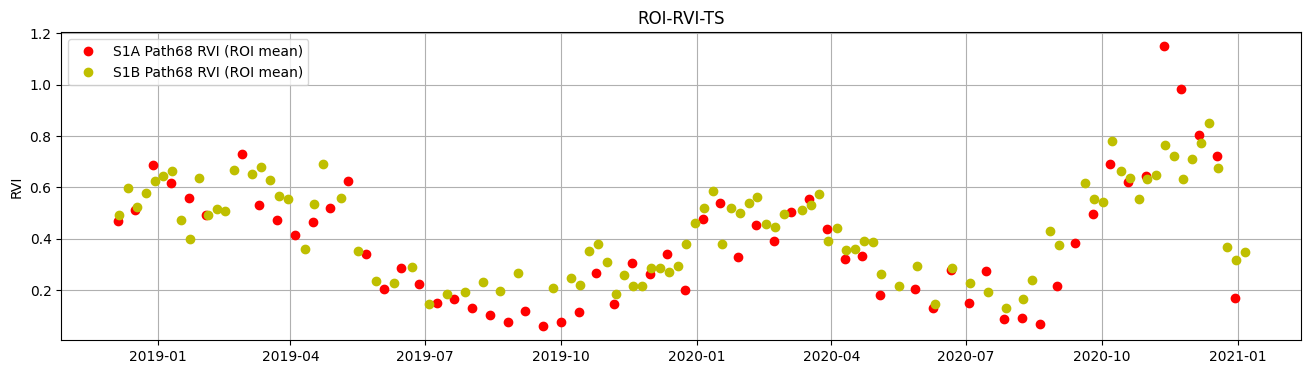

Sentinel-1A Path141 SAR time series


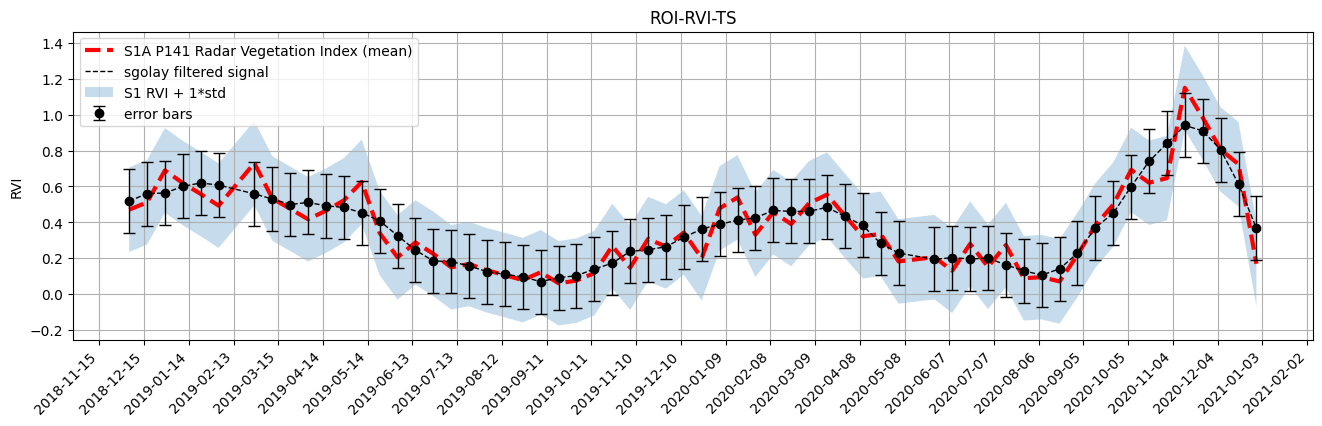

Sentinel-1 Path68 SAR time series


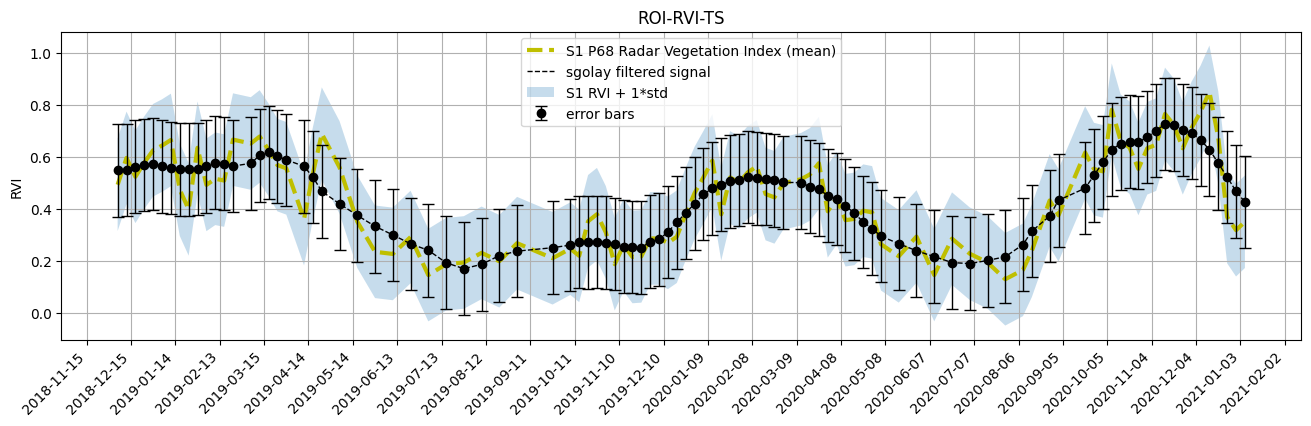

Sentinel-1 Path68 & Path141 SAR time series


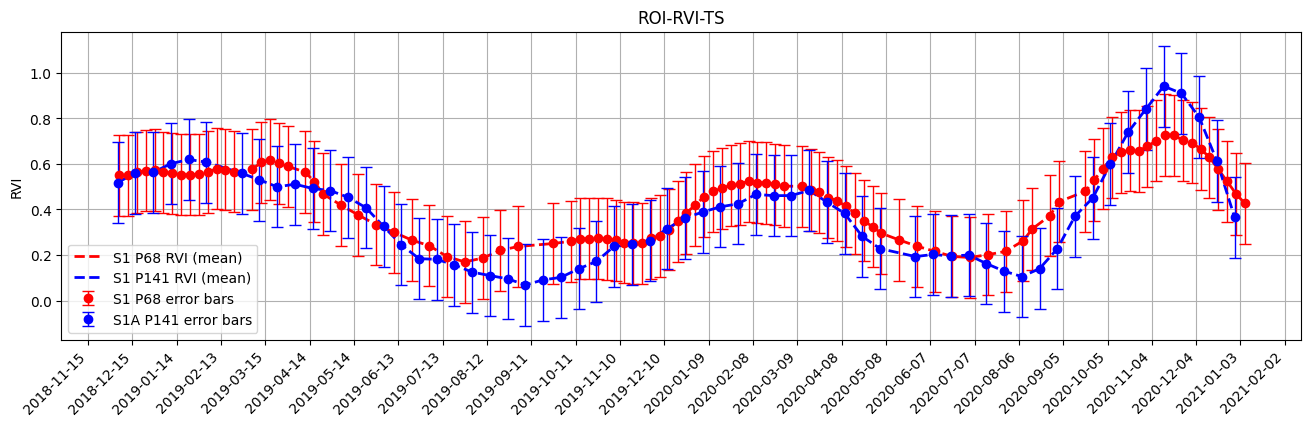

In [ ]:
S1A_P68  = 0
S1B_P68  = 0
S1A_P141 = 1
S1_P68 = 1

"""
S1_RVI_image_nparray_S1A_P68_mean = np.mean(S1_RVI_image_nparray_S1A_P68, axis=0);
S1_RVI_image_nparray_S1A_P68_mean = np.mean(S1_RVI_image_nparray_S1A_P68_mean, axis=0);
S1_RVI_image_nparray_S1A_P68_std = np.std(S1_RVI_image_nparray_S1A_P68_mean, axis = 0);

S1_RVI_image_nparray_S1B_P68_mean = np.mean(S1_RVI_image_nparray_S1B_P68, axis=0);
S1_RVI_image_nparray_S1B_P68_mean = np.mean(S1_RVI_image_nparray_S1B_P68_mean, axis=0);
S1_RVI_image_nparray_S1B_P68_std = np.std(S1_RVI_image_nparray_S1B_P68_mean, axis = 0);
"""

S1_RVI_image_nparray_S1A_P141_mean = np.mean(S1_RVI_image_nparray_S1A_P141, axis=0);
S1_RVI_image_nparray_S1A_P141_mean = np.mean(S1_RVI_image_nparray_S1A_P141_mean, axis=0);
S1_RVI_image_nparray_S1A_P141_std = np.std(S1_RVI_image_nparray_S1A_P141_mean, axis = 0)

S1_RVI_image_nparray_S1_P68_mean = np.mean(S1_RVI_image_nparray_S1_P68, axis=0);
S1_RVI_image_nparray_S1_P68_mean = np.mean(S1_RVI_image_nparray_S1_P68_mean, axis=0);
S1_RVI_image_nparray_S1_P68_std = np.std(S1_RVI_image_nparray_S1_P68_mean, axis = 0)

S1_P68_VH_image_nparray_mean = np.mean(S1_P68_VH_image_nparray, axis=0);
S1_P68_VH_image_nparray_mean = np.mean(S1_P68_VH_image_nparray_mean, axis=0);
S1_P68_VH_image_nparray_std = np.std(S1_P68_VH_image_nparray_mean, axis=0);

S1_P68_VV_image_nparray_mean = np.mean(S1_P68_VV_image_nparray, axis=0);
S1_P68_VV_image_nparray_mean = np.mean(S1_P68_VV_image_nparray_mean, axis=0);
S1_P68_VV_image_nparray_std = np.std(S1_P68_VV_image_nparray_mean, axis=0);

S1A_P141_VH_image_nparray_mean = np.mean(S1A_P141_VH_image_nparray, axis=0);
S1A_P141_VH_image_nparray_mean = np.mean(S1A_P141_VH_image_nparray_mean, axis=0);
S1A_P141_VH_image_nparray_std = np.std(S1A_P141_VH_image_nparray_mean, axis=0);

S1A_P141_VV_image_nparray_mean = np.mean(S1A_P141_VV_image_nparray, axis=0);
S1A_P141_VV_image_nparray_mean = np.mean(S1A_P141_VV_image_nparray_mean, axis=0);
S1A_P141_VV_image_nparray_std = np.std(S1A_P141_VV_image_nparray_mean, axis=0);

plt.figure(figsize= (16,4))

if S1A_P68:
    plt.plot(Dates_S1_filtered_S1A_P68,S1_RVI_image_nparray_S1A_P68_mean,'bo',lw=4)

if S1B_P68:
    plt.plot(Dates_S1_filtered_S1B_P68,S1_RVI_image_nparray_S1B_P68_mean,'ko',lw=4)

if S1A_P141:
    plt.plot(Dates_S1_filtered_S1A_P141,S1_RVI_image_nparray_S1A_P141_mean,'ro',lw=4)

if S1_P68:
    plt.plot(Dates_S1_filtered_P68,S1_RVI_image_nparray_S1_P68_mean,'yo',lw=4)

plt.title('ROI-RVI-TS')
plt.legend(['S1A Path68 RVI (ROI mean)','S1B Path68 RVI (ROI mean)','S1A Path141 RVI (ROI mean)','S1 Path68 RVI (ROI mean)'])
plt.ylabel("RVI")
plt.grid(1)
plt.show()

if S1A_P68:
#------------------------------
  print('Sentinel-1A Path68 SAR time series')

  plt.figure(figsize= (16,4))
  plt.plot(Dates_S1_filtered_S1A_P68,S1_RVI_image_nparray_S1A_P68_mean,'b--',lw=3)
  plt.fill_between(Dates_S1_filtered_S1A_P68,S1_RVI_image_nparray_S1A_P68_mean-S1_RVI_image_nparray_S1A_P68_std,S1_RVI_image_nparray_S1A_P68_mean+S1_RVI_image_nparray_S1A_P68_std ,alpha=0.25)
  plt.title('ROI-RVI-TS')
  plt.legend(['S1A P68 Radar Vegetation Index (mean)','S1 RVI + 1*std'])
  plt.grid(1)
  plt.ylabel("RVI")
  plt.show()

if S1B_P68:
#------------------------------
  print('Sentinel-1B Path68 SAR time series')

  plt.figure(figsize= (16,4))
  plt.plot(Dates_S1_filtered_S1B_P68,S1_RVI_image_nparray_S1B_P68_mean,'k--',lw=3)
  plt.fill_between(Dates_S1_filtered_S1B_P68,S1_RVI_image_nparray_S1B_P68_mean-S1_RVI_image_nparray_S1B_P68_std,S1_RVI_image_nparray_S1B_P68_mean+S1_RVI_image_nparray_S1B_P68_std ,alpha=0.25)
  plt.title('ROI-RVI-TS')
  plt.legend(['S1B P68 Radar Vegetation Index (mean)','S1 RVI + 1*std'])
  plt.grid(1)
  plt.ylabel("RVI")
  plt.show()

if S1A_P141:
#------------------------------
  print('Sentinel-1A Path141 SAR time series')

  S1A_P141_smooth = signal.savgol_filter(S1_RVI_image_nparray_S1A_P141_mean, window_length=9, polyorder=2, mode="nearest")

  plt.figure(figsize= (16,4))

  ax = plt.axes()
  ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.plot(Dates_S1_filtered_S1A_P141,S1_RVI_image_nparray_S1A_P141_mean,'r--',lw=3)
  plt.plot(Dates_S1_filtered_S1A_P141,S1A_P141_smooth,'k--',lw=1)
  plt.errorbar(Dates_S1_filtered_S1A_P141, S1A_P141_smooth, fmt='ko', label="data", yerr=S1_RVI_image_nparray_S1_P68_std, ecolor='black', lw=1,capsize=4)
  plt.fill_between(Dates_S1_filtered_S1A_P141,S1_RVI_image_nparray_S1A_P141_mean-S1_RVI_image_nparray_S1A_P141_std,S1_RVI_image_nparray_S1A_P141_mean+S1_RVI_image_nparray_S1A_P141_std ,alpha=0.25)
  plt.title('ROI-RVI-TS')
  plt.legend(['S1A P141 Radar Vegetation Index (mean)','sgolay filtered signal','S1 RVI + 1*std','error bars'])
  plt.grid(1)
  plt.xticks(rotation=45, ha='right')
  plt.ylabel("RVI")
  plt.show()

"""
  plt.figure(figsize= (16,4))
  plt.plot(Dates_S1_filtered_S1A_P141,S1A_P141_VH_image_nparray_mean,'k--',lw=3)
  plt.plot(Dates_S1_filtered_S1A_P141,S1A_P141_VV_image_nparray_mean,'b--',lw=3)
  plt.grid(1)
"""
if S1_P68:

  S1_P68_smooth = signal.savgol_filter(S1_RVI_image_nparray_S1_P68_mean, window_length=17, polyorder=2, mode="nearest")
#------------------------------
  print('Sentinel-1 Path68 SAR time series')


  plt.figure(figsize= (16,4))

  ax = plt.axes()
  ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.plot(Dates_S1_filtered_P68,S1_RVI_image_nparray_S1_P68_mean,'y--',lw=3)
  plt.plot(Dates_S1_filtered_P68,S1_P68_smooth,'k--',lw=1)
  plt.errorbar(Dates_S1_filtered_P68, S1_P68_smooth, fmt='ko', label="data", yerr=S1_RVI_image_nparray_S1_P68_std, ecolor='black', lw=1,capsize=4)
  plt.fill_between(Dates_S1_filtered_P68,S1_RVI_image_nparray_S1_P68_mean-S1_RVI_image_nparray_S1_P68_std,S1_RVI_image_nparray_S1_P68_mean+S1_RVI_image_nparray_S1_P68_std ,alpha=0.25)
  plt.title('ROI-RVI-TS')
  plt.legend(['S1 P68 Radar Vegetation Index (mean)','sgolay filtered signal','S1 RVI + 1*std','error bars'])
  plt.grid(1)
  plt.ylabel("RVI")
  plt.xticks(rotation=45, ha='right')
  plt.show()
"""
  plt.figure(figsize= (16,4))
  plt.plot(Dates_S1_filtered_P68,S1_P68_VH_image_nparray_mean,'k--',lw=3)
  plt.plot(Dates_S1_filtered_P68,S1_P68_VV_image_nparray_mean,'b--',lw=3)
"""
print('Sentinel-1 Path68 & Path141 SAR time series')


plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S1_filtered_P68,S1_P68_smooth,'r--',lw=2)
plt.errorbar(Dates_S1_filtered_P68, S1_P68_smooth, fmt='ro', label="data", yerr=S1_RVI_image_nparray_S1_P68_std, ecolor='red', lw=1,capsize=4)
plt.plot(Dates_S1_filtered_S1A_P141,S1A_P141_smooth,'b--',lw=2)
plt.errorbar(Dates_S1_filtered_S1A_P141,S1A_P141_smooth, fmt='bo', label="data", yerr=S1_RVI_image_nparray_S1_P68_std, ecolor='blue', lw=1,capsize=4)

plt.title('ROI-RVI-TS')
plt.legend(['S1 P68 RVI (mean)','S1 P141 RVI (mean)','S1 P68 error bars','S1A P141 error bars'])
plt.grid(1)
plt.ylabel("RVI")
plt.xticks(rotation=45, ha='right')
plt.show()


### **MOGPTK Algorithm selection**

Functions definitions

In [ ]:
class TransformStandard(mogptk.TransformBase):
    """
    Transform the data so it has mean 0 and variance 1
    """
    def __init__(self):
        pass

    def set_data(self, y, x=None):
        self.mean = y.mean()
        self.std = y.std()

    def forward(self, y, x=None):
        return (y - self.mean) / self.std

    def backward(self, y, x=None):
        return (y * self.std) + self.mean

Dataset generation

In [ ]:
# From datetime to time-stamps (days since 1900/01/01)
baseDate = datetime.datetime(1900,1,1).date()

numericalDates_S2 = []
#numericalDates_S1A_P68 = []
#numericalDates_S1B_P68 = []
numericalDates_S1A_P141 = []
numericalDates_S1_P68 = []

numericalDates_S2 = np.asarray([(d - baseDate).days for d in Dates_S2])
#numericalDates_S1A_P68 = np.asarray([(d - baseDate).days for d in Dates_S1_filtered_S1A_P68])
#numericalDates_S1B_P68 = np.asarray([(d - baseDate).days for d in Dates_S1_filtered_S1B_P68])
numericalDates_S1A_P141 = np.asarray([(d - baseDate).days for d in Dates_S1_filtered_S1A_P141])
numericalDates_S1_P68 = np.asarray([(d - baseDate).days for d in Dates_S1_filtered_P68])

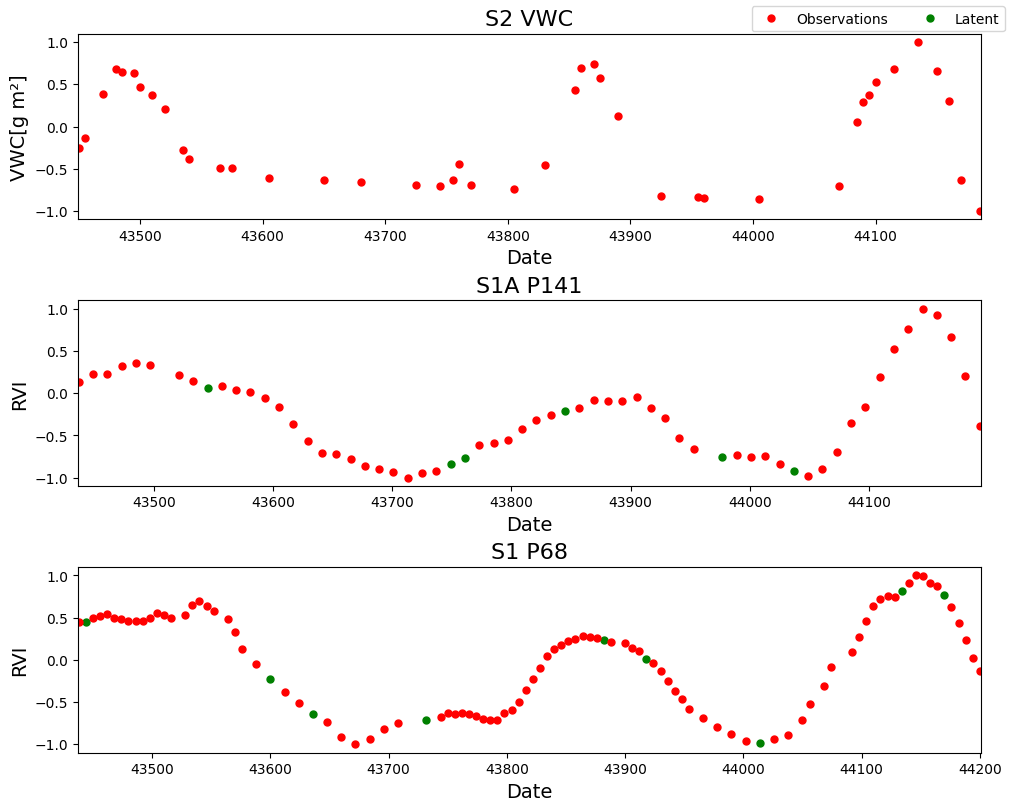

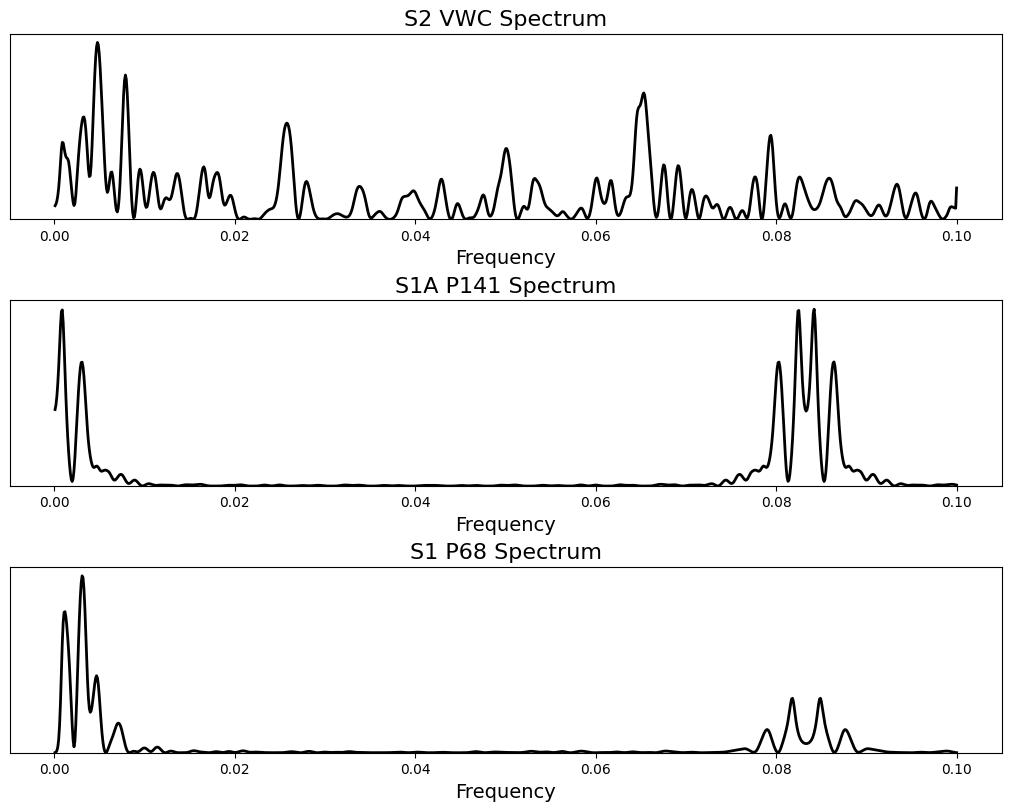

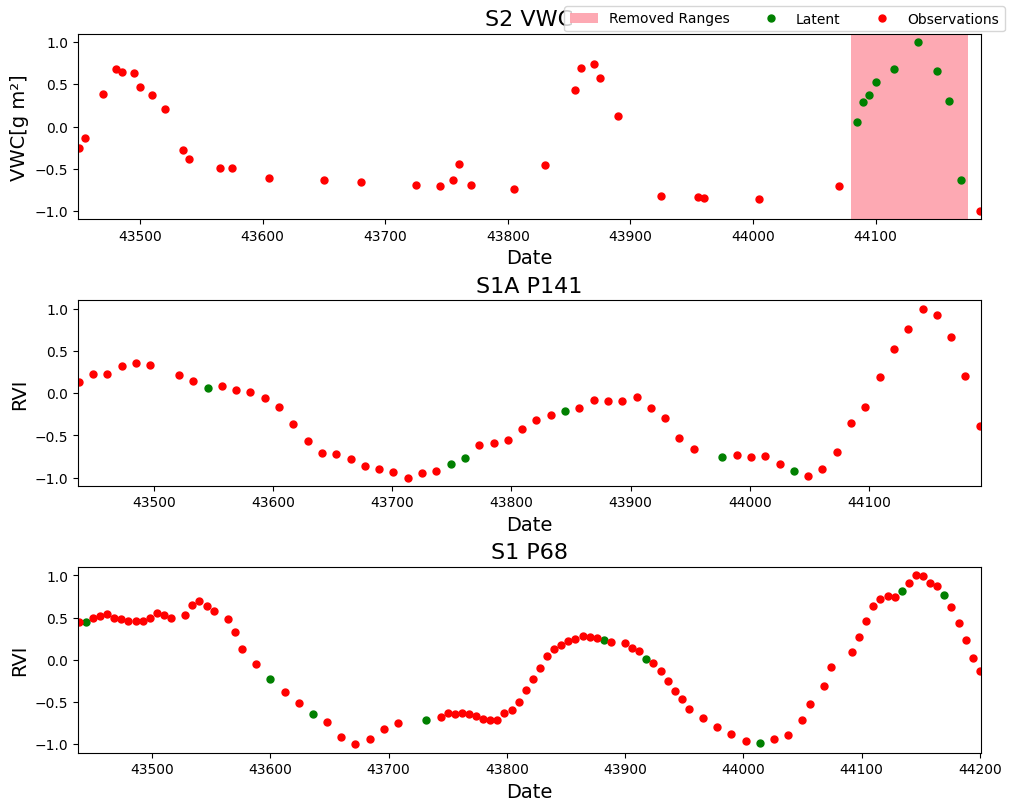

In [ ]:
## create dataset
np.random.seed(10)  # for reproducibility

filtering=1;
svg_param = 17;
svg_poly = 4;

#S2_rem_start = 44080
#S2_rem_end = 44175

S1A_P141_dataset = 1
S1_P68_dataset = 1

wheat_2020=1
wheat_2021=0

if filtering==1:
  #Y1 =  signal.savgol_filter(S2_GPR_parcel_mean, window_length=3, polyorder=2, mode="nearest")
  Y1 = S2_GPR_parcel_mean
  #Y1 = y_filtfilt
  #Y1 = mean_prediction2
  #Y2 = signal.savgol_filter(S1_RVI_image_nparray_S1A_P68_mean, window_length=svg_param, polyorder=svg_poly, mode="nearest")
  #Y3 = signal.savgol_filter(S1_RVI_image_nparray_S1B_P68_mean, window_length=svg_param, polyorder=svg_poly, mode="nearest")
  Y4 = S1A_P141_smooth
  #Y4 = signal.savgol_filter(S1_RVI_image_nparray_S1A_P141_mean, window_length=svg_param, polyorder=svg_poly, mode="nearest")
  #Y5 = signal.savgol_filter(S1_RVI_image_nparray_S1_P68_mean, window_length=svg_param, polyorder=svg_poly, mode="nearest")
  Y5 = S1_P68_smooth

if filtering==0:
  Y1 = S2_GPR_parcel_mean
  #Y2 = S1_RVI_image_nparray_S1A_P68_mean
  #Y3 = S1_RVI_image_nparray_S1B_P68_mean
  Y4 = S1_RVI_image_nparray_S1A_P141_mean
  Y5 = S1_RVI_image_nparray_S1_P68_mean

if S1A_P141_dataset==1:
  dataset_S1S2 = mogptk.DataSet(
      mogptk.Data(numericalDates_S2, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1_P68, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1A_P68, Y2, x_labels='Date', y_label='RVI[dB]', name='S1A P68'),
      #mogptk.Data(numericalDates_S1B_P68, Y3, x_labels='Date', y_label='RVI[dB]', name='S1B P68'),
      mogptk.Data(numericalDates_S1A_P141, Y4, x_labels='Date', y_label='RVI[dB]', name='S1A P141'),
      #mogptk.Data(numericalDates_S1_P68, Y5, x_labels='Date', y_label='RVI[dB]', name='S1 P68'),
  )
  dataset_S1S2[1].remove_randomly(pct=0.1),

if S1_P68_dataset==1:
  dataset_S1S2 = mogptk.DataSet(
      mogptk.Data(numericalDates_S2, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1_P68, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1A_P68, Y2, x_labels='Date', y_label='RVI[dB]', name='S1A P68'),
      #mogptk.Data(numericalDates_S1B_P68, Y3, x_labels='Date', y_label='RVI[dB]', name='S1B P68'),
      #mogptk.Data(numericalDates_S1A_P141, Y4, x_labels='Date', y_label='RVI[dB]', name='S1A P141'),
      mogptk.Data(numericalDates_S1_P68, Y5, x_labels='Date', y_label='RVI[dB]', name='S1 P68'),

  )
  dataset_S1S2[1].remove_randomly(pct=0.1),

if S1A_P141_dataset==1 & S1_P68_dataset==1:
  dataset_S1S2 = mogptk.DataSet(
      mogptk.Data(numericalDates_S2, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1_P68, Y1, x_labels='Date', y_label='VWC[g m\N{SUPERSCRIPT TWO}]', name='S2 VWC'),
      #mogptk.Data(numericalDates_S1A_P68, Y2, x_labels='Date', y_label='RVI[dB]', name='S1A P68'),
      #mogptk.Data(numericalDates_S1B_P68, Y3, x_labels='Date', y_label='RVI[dB]', name='S1B P68'),
      mogptk.Data(numericalDates_S1A_P141, Y4, x_labels='Date', y_label='RVI', name='S1A P141'),
      mogptk.Data(numericalDates_S1_P68, Y5, x_labels='Date', y_label='RVI', name='S1 P68'),

  )
  dataset_S1S2[1].remove_randomly(pct=0.1)
  dataset_S1S2[2].remove_randomly(pct=0.1)

dataset_S1S2.transform(mogptk.TransformDetrend(degree=1))
dataset_S1S2.transform(TransformStandard())
dataset_S1S2.transform(mogptk.TransformNormalize())
dataset_S1S2.plot('Normalized data set', transformed=True,figsize=(10,8))

# Preprocess by randomly removing points
#dataset_S1S2[0].remove_randomly(15)
#dataset_S1S2[0].remove_relative_range(start=0.7, end=1.0, dim=None)
#dataset_S1S2[1].remove_randomly(pct=0.1)
#dataset_S1S2[2].remove_randomly(pct=0.1)
#dataset_S1S2[3].remove_randomly(pct=0.1)

if wheat_2020==1:
  # remove first half of the first channel (VBRC Wheat 2020)
  dataset_S1S2[0].remove_range(start=44080, end=44175)
if wheat_2021==1:
  # remove first half of the first channel (VBRC Wheat 2021)
  dataset_S1S2[0].remove_range(start=44425, end=44525)

# remove S1B no acquisition dates
#dataset_S1S2[1].remove_range(start=43950, end=44050)
#dataset_S1S2[2].remove_range(start=43580, end=43735)
#dataset_S1S2[3].remove_range(start=43800, end=43900)

dataset_S1S2.plot_spectrum(maxfreq=0.1,figsize=(10,8));
dataset_S1S2.plot('Normalized data set', transformed=True,figsize=(10,8));
nc = len(dataset_S1S2); #number of channels

In [ ]:
#valid methods of estimation are BNSE, LS, and SM
#optimizer must be LBFGS, Adam, SGD, or AdaGrad
Q = 4
init_method = 'SM'
method = 'Adam'
lr = 0.1
iters = 500
nc = len(dataset_S1S2); #number of channels

### **Multi-output spectral mixture kernel**

--- 25.626041412353516 seconds ---


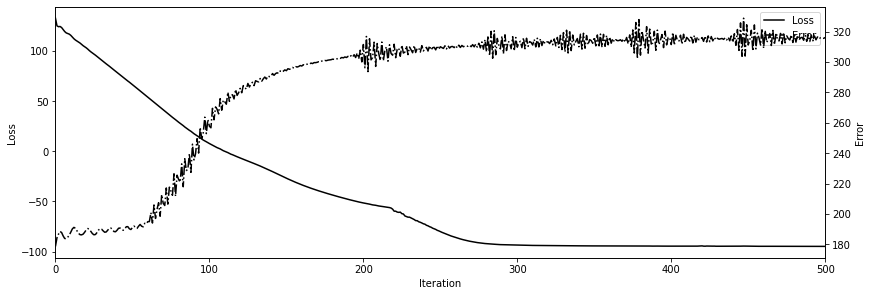

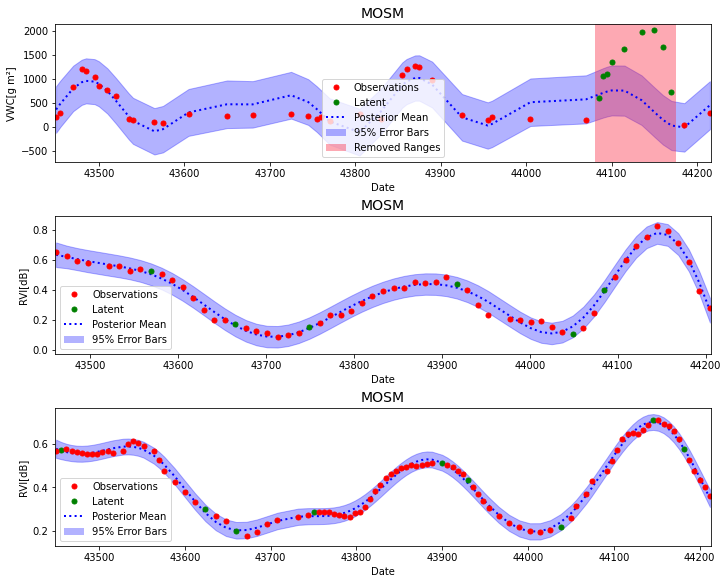

In [ ]:
mosm_dataset = dataset_S1S2.copy()

start_time = time.time()

mosm = mogptk.MOSM(mosm_dataset, Q=Q)
mosm.init_parameters(init_method)

mosm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
mosm.plot_prediction(title='MOSM',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
mosm_mae = np.zeros((1,nc))
mosm_rmse = np.zeros((1,nc))
mosm_mape = np.zeros((1,nc))

mosm_error = mogptk.error(mosm, per_channel=True)[0]
mosm_mae[:] = np.array([item['MAE'] for item in mosm_error])
mosm_rmse[:] = np.array([item['RMSE'] for item in mosm_error])
mosm_mape[:] = np.array([item['MAPE'] for item in mosm_error])

mogptk.error(mosm, disp=True, per_channel=True);
print('\n')

MAE       MAPE         RMSE
Name                                              
MOSM channel 1  843.188402  57.720019  1003.287650
MOSM channel 2    0.020604  11.621742     0.025700
MOSM channel 3    0.010342   3.219028     0.012923

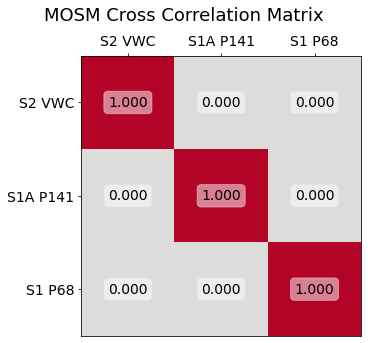

In [ ]:
mosm.plot_correlation(title='MOSM Cross Correlation Matrix',figsize=(5, 5));
#mosm.plot_spectrum(title='PSD with mosm trained');

### **Cross spectral mixture kernel**

--- 37.984888315200806 seconds ---


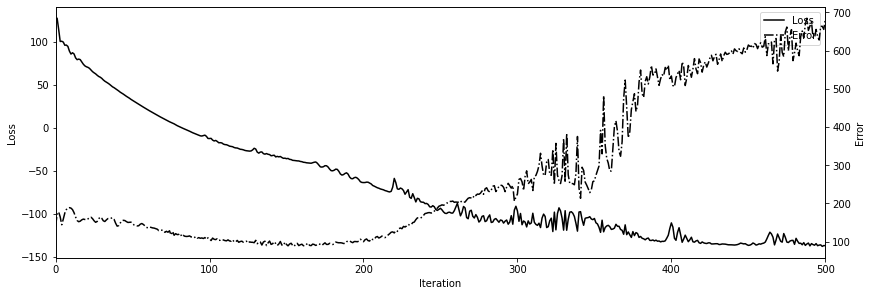

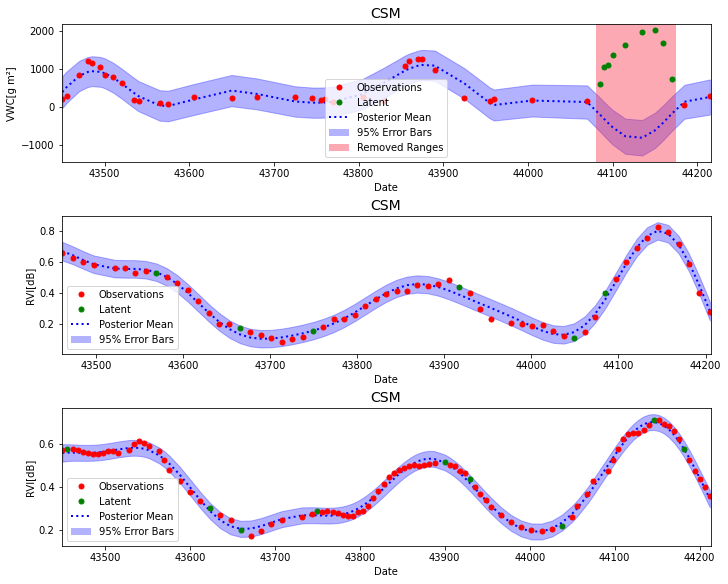

In [ ]:
csm_dataset = dataset_S1S2.copy()

start_time = time.time()

csm = mogptk.CSM(csm_dataset, Q=Q)
csm.init_parameters(init_method)

csm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
csm.plot_prediction(title='CSM',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
csm_mae = np.zeros((1,nc))
csm_rmse = np.zeros((1,nc))
csm_mape = np.zeros((1,nc))

csm_error = mogptk.error(csm, per_channel=True)[0]
csm_mae[:] = np.array([item['MAE'] for item in csm_error])
csm_rmse[:] = np.array([item['RMSE'] for item in csm_error])
csm_mape[:] = np.array([item['MAPE'] for item in csm_error])

mogptk.error(csm, disp=True, per_channel=True);

MAE        MAPE         RMSE
Name                                               
CSM channel 1  1820.559620  134.292658  1942.819872
CSM channel 2     0.030920   14.571189     0.036192
CSM channel 3     0.010969    3.199063     0.012758

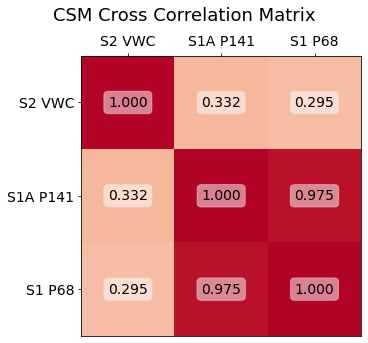

In [ ]:
csm.plot_correlation(title='CSM Cross Correlation Matrix',figsize=(5, 5));
#csm.plot_spectrum(title='PSD with csm trained');

### **Linear model of coregionalization with spectral mixture kernels**

--- 25.74787950515747 seconds ---


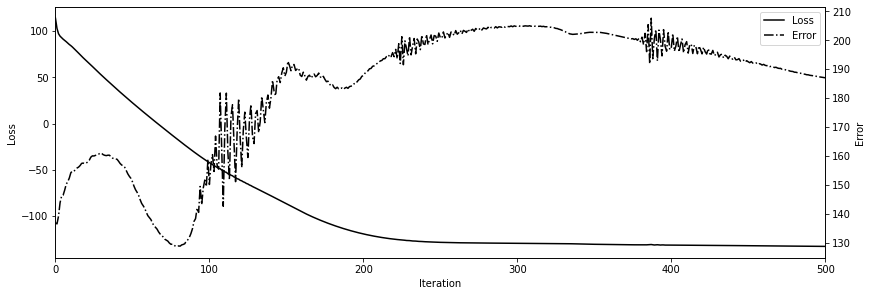

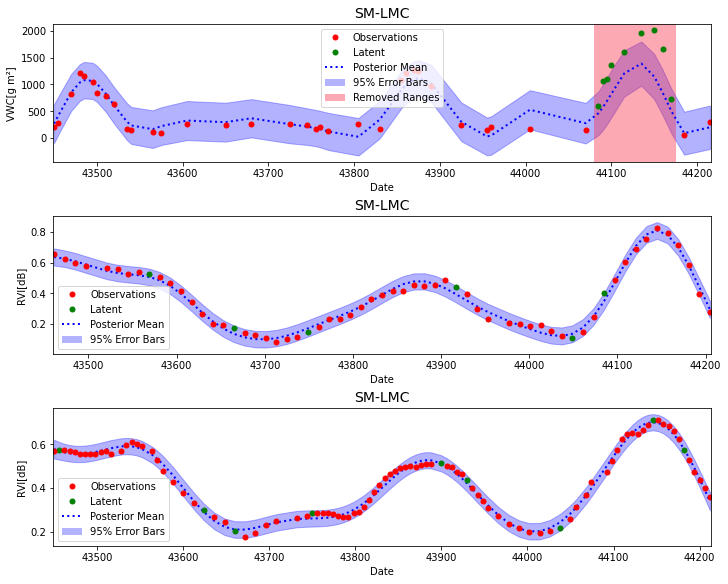

In [ ]:
smlmc_dataset = dataset_S1S2.copy()

start_time = time.time()

smlmc = mogptk.SM_LMC(smlmc_dataset, Q=Q)
smlmc.init_parameters(init_method)

smlmc.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
smlmc.plot_prediction(title='SM-LMC',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
smlmc_mae = np.zeros((1,nc))
smlmc_rmse = np.zeros((1,nc))
smlmc_mape = np.zeros((1,nc))

smlmc_error = mogptk.error(smlmc, per_channel=True)[0]
smlmc_mae[:] = np.array([item['MAE'] for item in smlmc_error])
smlmc_rmse[:] = np.array([item['RMSE'] for item in smlmc_error])
smlmc_mape[:] = np.array([item['MAPE'] for item in smlmc_error])

mogptk.error(smlmc, disp=True, per_channel=True);
print('\n')

MAE       MAPE        RMSE
Name                                               
SM-LMC channel 1  498.647424  36.004852  548.965703
SM-LMC channel 2    0.034558  15.244988    0.036419
SM-LMC channel 3    0.011669   3.846760    0.014253

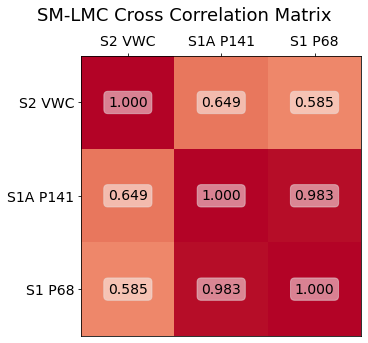

In [ ]:
smlmc.plot_correlation(title='SM-LMC Cross Correlation Matrix',figsize=(5, 5));
#smlmc.plot_spectrum(title='PSD with sm-lmc trained');

###**Convolutional Gaussian kernel**

--- 47.62851285934448 seconds ---


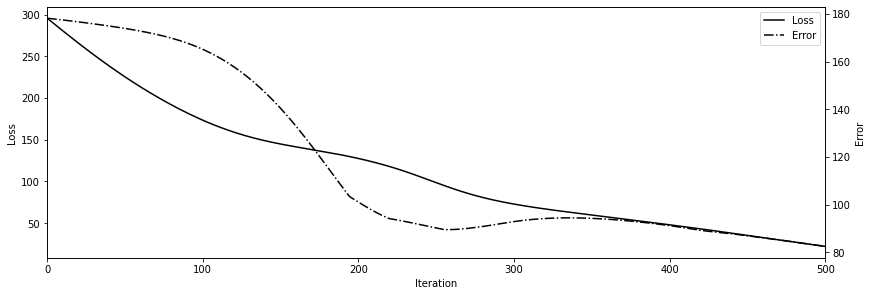

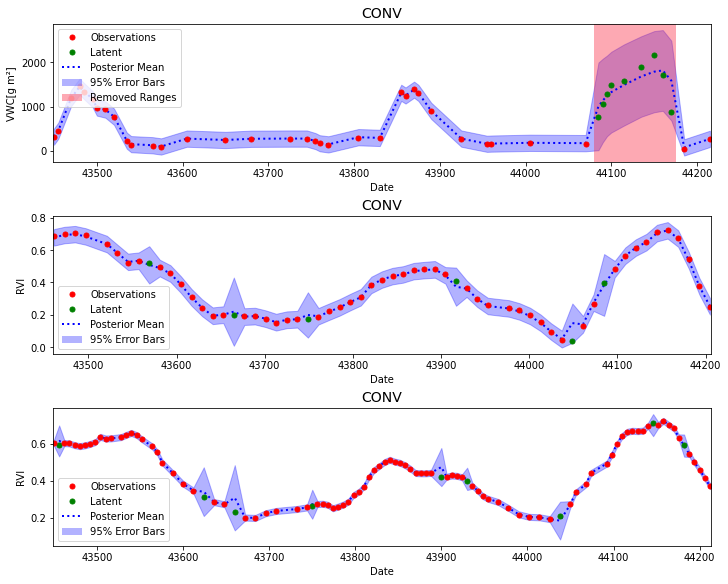

In [ ]:
conv_dataset = dataset_S1S2.copy()

start_time = time.time()

conv = mogptk.CONV(conv_dataset, Q=Q)
conv.init_parameters(init_method)

conv.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True,)
conv.plot_prediction(title='CONV',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
conv_mae = np.zeros((1,nc))
conv_rmse = np.zeros((1,nc))
conv_mape = np.zeros((1,nc))

conv_error = mogptk.error(conv, per_channel=True)[0]
conv_mae[:] = np.array([item['MAE'] for item in conv_error])
conv_rmse[:] = np.array([item['RMSE'] for item in conv_error])
conv_mape[:] = np.array([item['MAPE'] for item in conv_error])

mogptk.error(conv, disp=True, per_channel=True);
print('\n')

MAE       MAPE        RMSE
Name                                             
CONV channel 1  340.201213  31.587089  376.222374
CONV channel 2    0.078497  45.426566    0.087658
CONV channel 3    0.034515  12.523771    0.053863

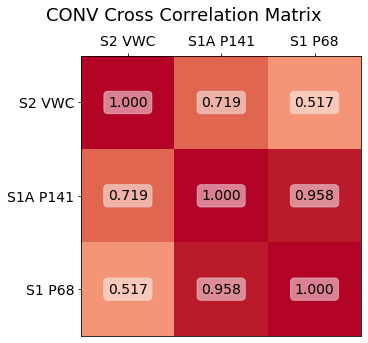

In [ ]:
conv.plot_correlation(title='CONV Cross Correlation Matrix',figsize=(5, 5));

### **Independent spectral mixture kernels**

--- 12.50733232498169 seconds ---


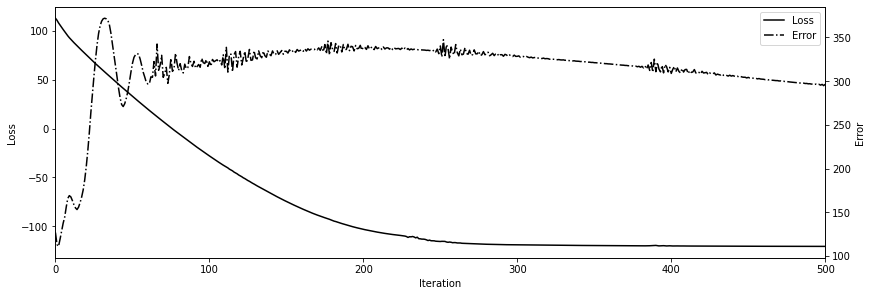

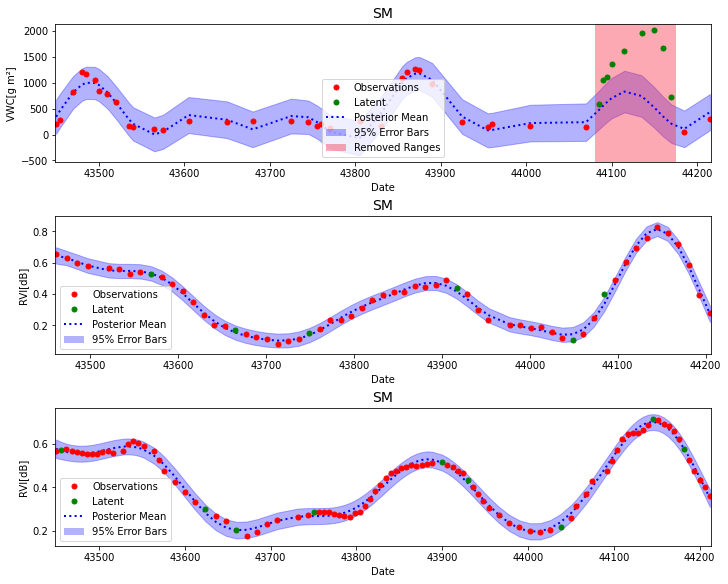

In [ ]:
#valid methods of estimation are IPS, LS, and BNSE

init_method_sm = 'BNSE'
sm_dataset = dataset_S1S2.copy()

start_time = time.time()

sm = mogptk.SM(sm_dataset, Q=Q)
sm.init_parameters(init_method_sm)

sm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
sm.plot_prediction(title='SM',figsize=(10,8))

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
sm_mae = np.zeros((1,nc))
sm_rmse = np.zeros((1,nc))
sm_mape = np.zeros((1,nc))

sm_error = mogptk.error(sm, per_channel=True)[0]
sm_mae[:] = np.array([item['MAE'] for item in sm_error])
sm_rmse[:] = np.array([item['RMSE'] for item in sm_error])
sm_mape[:] = np.array([item['MAPE'] for item in sm_error])

mogptk.error(sm, disp=True, per_channel=True);
print('\n')

MAE       MAPE        RMSE
Name                                           
SM channel 1  790.422036  55.074633  900.684617
SM channel 2    0.026802  12.806324    0.032917
SM channel 3    0.010456   3.261192    0.013017

### **Results**

In [ ]:
print('RMSE errors per model - General')
print('MOSM:    %g ± %g' % (mosm_rmse.mean(1).mean(), mosm_rmse.mean(1).std()))
print('CSM:     %g ± %g' % (csm_rmse.mean(1).mean(), csm_rmse.mean(1).std()))
print('SM-LMC:  %g ± %g' % (smlmc_rmse.mean(1).mean(), smlmc_rmse.mean(1).std()))
print('CONV:    %g ± %g' % (conv_rmse.mean(1).mean(), conv_rmse.mean(1).std()))
print('SM:      %g ± %g' % (sm_rmse.mean(1).mean(), sm_rmse.mean(1).std()))

print('\n')

print('RMSE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_rmse[0,0]))
print('CSM:     %g' % (csm_rmse[0,0]))
print('SM-LMC:  %g' % (smlmc_rmse[0,0]))
print('CONV:    %g' % (conv_rmse[0,0]))
print('SM:      %g' % (sm_rmse[0,0]))

print('\n')

print('MAE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_mae[0,0]))
print('CSM:     %g' % (csm_mae[0,0]))
print('SM-LMC:  %g' % (smlmc_mae[0,0]))
print('CONV:    %g' % (conv_mae[0,0]))
print('SM:      %g' % (sm_mae[0,0]))

print('\n')

print('MAPE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_mape[0,0]))
print('CSM:     %g' % (csm_mape[0,0]))
print('SM-LMC:  %g' % (smlmc_mape[0,0]))
print('CONV:    %g' % (conv_mape[0,0]))
print('SM:      %g' % (sm_mape[0,0]))

RMSE errors per model - General
MOSM:    334.442 ± 0
CSM:     647.623 ± 0
SM-LMC:  183.005 ± 0
CONV:    125.455 ± 0
SM:      300.244 ± 0


RMSE errors per model - Channel 0
MOSM:    1003.29
CSM:     1942.82
SM-LMC:  548.966
CONV:    376.222
SM:      900.685


MAE errors per model - Channel 0
MOSM:    843.188
CSM:     1820.56
SM-LMC:  498.647
CONV:    340.201
SM:      790.422


MAPE errors per model - Channel 0
MOSM:    57.72
CSM:     134.293
SM-LMC:  36.0049
CONV:    31.5871
SM:      55.0746


In [ ]:
pd.DataFrame(np.c_[mosm_mae[0,0],csm_mae[0,0],smlmc_mae[0,0],conv_mae[0,0],sm_mae[0,0]],
             columns=['MOSM-MAE', 'CSM-MAE', 'SM-LMC-MAE', 'CONV-MAE', 'SM-MAE'])

MOSM-MAE     CSM-MAE  SM-LMC-MAE    CONV-MAE      SM-MAE
0  843.188402  1820.55962  498.647424  340.201213  790.422036

In [ ]:
xtest, ytest = dataset_S1S2.get_test_data()
xtrain, ytrain = dataset_S1S2.get_train_data()
tpred = dataset_S1S2.get_prediction_data()
x, y_mean, y_var_lower, y_var_upper = conv.predict(sigma=1)

Recovered Sentinel-1 time series


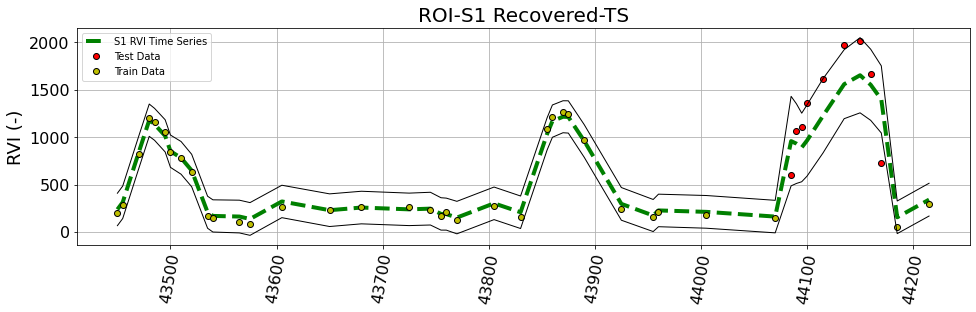

In [ ]:
print('Recovered Sentinel-1 time series')

plt.figure(figsize= (16,4))
plt.plot(np.asarray(x[0]),y_mean[0],'--g', lw=4)
plt.plot(np.asarray(xtest[0]),ytest[0],linestyle="",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6, lw=4)
plt.plot(np.asarray(xtrain[0]),ytrain[0],linestyle="",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6, lw=4)
#plt.fill_between(np.asarray(x[0]),y_var_lower[0],y_var_upper[0] ,alpha=0.25)
plt.plot(np.asarray(x[0]),y_var_lower[0],'-k', lw=1)
plt.plot(np.asarray(x[0]),y_var_upper[0],'-k', lw=1)
plt.title('ROI-S1 Recovered-TS',fontsize=20)
plt.ylabel("RVI (-)",fontsize=18)
plt.legend(['S1 RVI Time Series','Test Data','Train Data'])
plt.xticks(rotation=80,fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
x, y_mean_mosm, y_var_lower_mosm, y_var_upper_mosm = mosm.predict(sigma=1)
x, y_mean_csm, y_var_lower_csm, y_var_upper_csm = csm.predict(sigma=1)
x, y_mean_sm, y_var_lower_sm, y_var_upper_sm = sm.predict(sigma=1)
x, y_mean_conv, y_var_lower_conv, y_var_upper_conv = conv.predict(sigma=1)
x, y_mean_smlmc, y_var_lower_smlmc, y_var_upper_smlmc = smlmc.predict(sigma=1)

print('S2 time series length',(np.asarray(y_mean_csm[0])).shape)
print('S1A Path 141 time series length',(np.asarray(y_mean_csm[1])).shape)
print('S1 Path 68 time series length',(np.asarray(y_mean_csm[2])).shape)

S2 time series length (44,)
S1A Path 141 time series length (61,)
S1 Path 68 time series length (99,)


In [ ]:
#Numpy array to datetime conversion
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

#import datetime

"""
C=[None] * numericalDates_S2.shape[0]
for i in range(numericalDates_S2.shape[0]):
  aux = int(numericalDates_S2[i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  C[i] = B
"""
S2_X_test=[None] * xtest[0].shape[0]
for i in range(xtest[0].shape[0]):
  aux = int(xtest[0][i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  S2_X_test[i] = B

S2_X_train=[None] * xtrain[0].shape[0]
for i in range(xtrain[0].shape[0]):
  aux = int(xtrain[0][i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  S2_X_train[i] = B

Recovered Sentinel-2 time series


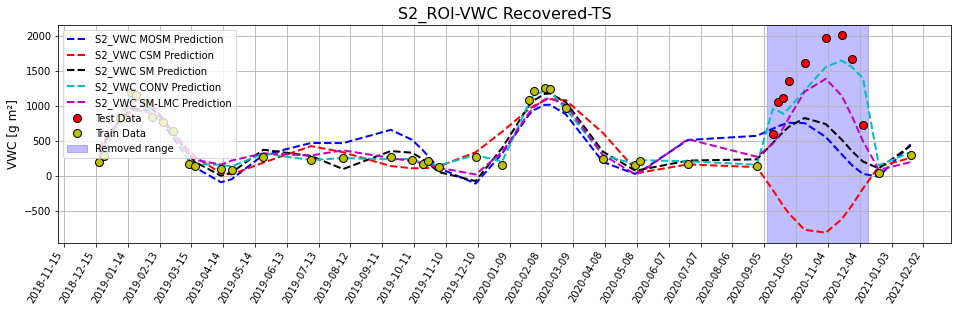

In [ ]:
print('Recovered Sentinel-2 time series')

if wheat_2020==1:
  S2_rem_start_date = datetime.timedelta(days = 44080) + baseDate
  S2_rem_end_date = datetime.timedelta(days = 44175) + baseDate

if wheat_2021==1:
  S2_rem_start_date = datetime.timedelta(days = 44425) + baseDate
  S2_rem_end_date = datetime.timedelta(days = 44525) + baseDate

plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,y_mean_mosm[0],'--b', lw=2)
plt.plot(Dates_S2,y_mean_csm[0],'--r', lw=2)
plt.plot(Dates_S2,y_mean_sm[0],'--k', lw=2)
plt.plot(Dates_S2,y_mean_conv[0],'--c', lw=2)
plt.plot(Dates_S2,y_mean_smlmc[0],'--m', lw=2)
plt.plot(S2_X_test,ytest[0],linestyle="",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=8, lw=1)
plt.plot(S2_X_train,ytrain[0],linestyle="",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=8, lw=1)
plt.axvspan(S2_rem_start_date, S2_rem_end_date, alpha=0.25, color='blue')

plt.title('S2_ROI-VWC Recovered-TS',fontsize=16)
plt.ylabel("VWC [g m\N{SUPERSCRIPT TWO}]",fontsize=12)
plt.legend(['S2_VWC MOSM Prediction','S2_VWC CSM Prediction','S2_VWC SM Prediction','S2_VWC CONV Prediction','S2_VWC SM-LMC Prediction','Test Data','Train Data','Removed range'], loc='upper left')

plt.xticks(rotation=60,ha='right')
#plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### **WHITTAKER SMOOTHING**

In [ ]:
mogpr_in1 = S2_GPR_image_nparray.reshape(S2_GPR_image_nparray.shape[0]*S2_GPR_image_nparray.shape[1], S2_GPR_image_nparray.shape[2])
mogpr_in2 = S1_RVI_image_nparray_S1_P68.reshape(S1_RVI_image_nparray_S1_P68.shape[0]*S1_RVI_image_nparray_S1_P68.shape[1],S1_RVI_image_nparray_S1_P68.shape[2])
mogpr_in3 = S1_RVI_image_nparray_S1A_P141.reshape(S1_RVI_image_nparray_S1A_P141.shape[0]*S1_RVI_image_nparray_S1A_P141.shape[1],S1_RVI_image_nparray_S1A_P141.shape[2])
print('MOGPR_in1(size):' , mogpr_in1.shape)
print('MOGPR_in2(size):' ,mogpr_in2.shape)
print('MOGPR_in3(size):' ,mogpr_in3.shape)

MOGPR_in1(size): (999, 44)
MOGPR_in2(size): (999, 99)
MOGPR_in3(size): (999, 61)


In [ ]:
# create weights for Whittaker smoothing
Y1_Ws = mogpr_in1
Y2_Ws_in = mogpr_in2
Y3_Ws_in = mogpr_in3

w2 =  np.array((S1_RVI_image_nparray_S1_P68_mean!=-3000)*1,dtype='double')
w3 =  np.array((S1_RVI_image_nparray_S1A_P141_mean!=-3000)*1,dtype='double')

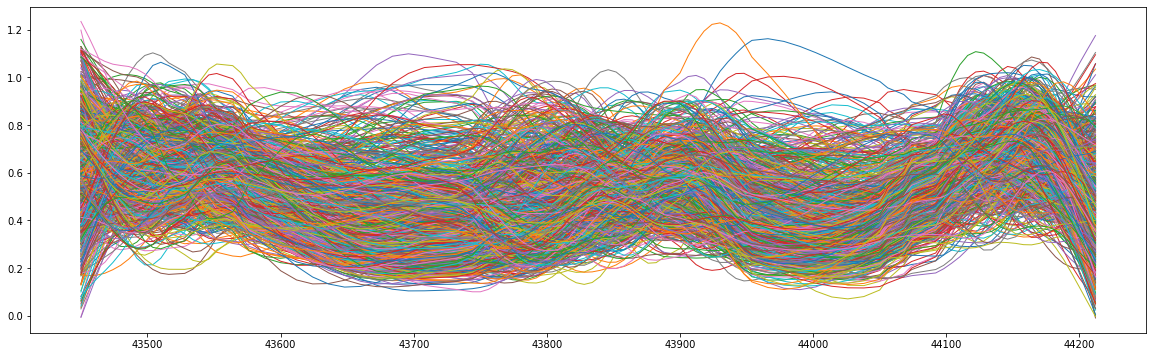

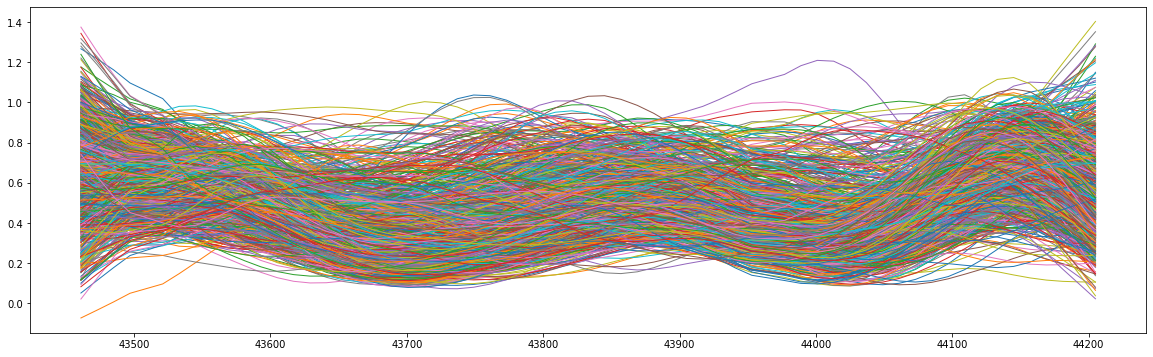

In [ ]:
# Apply Whittaker filter
d = 75

Y2_Ws_out = []
for i in range (Y2_Ws_in.shape[0]):
    y_aux = Y2_Ws_in[i,:]
    YW = ws2d(y_aux,d,w2)
    Y2_Ws_out.append(YW)
Y2_Ws_out = np.array(Y2_Ws_out)

Y3_Ws_out = []
for i in range (Y3_Ws_in.shape[0]):
    y_aux = Y3_Ws_in[i,:]
    YW = ws2d(y_aux,d,w3)
    Y3_Ws_out.append(YW)
Y3_Ws_out = np.array(Y3_Ws_out)

plt.figure(figsize= (20,6))
for i in range (Y2_Ws_out.shape[0]):
    plt.plot(numericalDates_S1_P68,Y2_Ws_out[i,:], lw=1)
    #time.sleep(0.05)

plt.figure(figsize= (20,6))
for i in range (Y3_Ws_out.shape[0]):
    plt.plot(numericalDates_S1A_P141,Y3_Ws_out[i,:], lw=1)
    #time.sleep(0.05)

In [ ]:
#Create a list of datasets for MOGPR
dataset_S1S2_Ws_pixels = []
for i in range (Y1_Ws.shape[0]):

    aux_dataset = mogptk.DataSet(mogptk.Data(numericalDates_S2, Y1_Ws[i,:], name='S2 NDVI Time Series'),
                                 mogptk.Data(numericalDates_S1_P68, Y2_Ws_out[i,:], name='S1 P68 RVI Time Series'),
                                 mogptk.Data(numericalDates_S1A_P141, Y3_Ws_out[i,:], name='S1A P141 RVI Time Series'),

    )
    dataset_S1S2_Ws_pixels.append(aux_dataset)

for i in range (Y1_Ws.shape[0]):
    dataset_S1S2_Ws_pixels[i].transform(mogptk.TransformDetrend(degree=1))
    dataset_S1S2_Ws_pixels[i].transform(TransformStandard())
    dataset_S1S2_Ws_pixels[i].transform(mogptk.TransformNormalize())

# remove second half of the first channel
for i in range (Y1_Ws.shape[0]):
    dataset_S1S2_Ws_pixels[i][0].remove_range(start=44080, end=44175)

#dataset_S1S2_Ws_pixels[29].plot(transformed=True)

In [ ]:
#Train model for each pixel in the dataset

global_start_time = time.time()
model_pixel =[]
for i in range (Y1_Ws.shape[0]):
    start_time = time.time()
    aux_model = mogptk.CONV(dataset_S1S2_Ws_pixels[i], Q=Q)
    aux_model.init_parameters(init_method)
    aux_model.train(method=method,iters=500, lr=lr,
          verbose=False, error='MAE', plot=False)
    aux_model.predict()
    model_pixel.append(aux_model)
    print("--- %s seconds ---" % (time.time() - start_time))

print("--- %s seconds ---" % (time.time() - global_start_time))

#Save prediction for each model at pixel level
x = []
y_mean = []
y_var_lower = []
y_var_upper = []

for i in range (Y1_Ws.shape[0]):
    x_aux, y_mean_aux, y_var_lower_aux, y_var_upper_aux = model_pixel[i].predict(sigma=1)
    x.append(x_aux)
    y_mean.append(y_mean_aux)
    y_var_lower.append(y_var_lower_aux)
    y_var_upper.append(y_var_upper_aux)

#Create an image numpy array
A_aux=pd.DataFrame(y_mean)
S2_VWC_recovered =[]
for i in range (Y1_Ws.shape[0]):
    S2_recovered_aux=np.asarray(A_aux[0][i])
    S2_VWC_recovered.append(S2_recovered_aux)

S2_VWC_recovered_array=np.asarray(S2_VWC_recovered)
S2_VWC_recovered_array_image = S2_VWC_recovered_array.reshape(S2_GPR_image_nparray.shape[0],S2_GPR_image_nparray.shape[1],S2_GPR_image_nparray.shape[2])

#Save the numpy array to Google Drive
file_save_name = 'S2_VWC_recovered_array_image.mat'
file_path = F"/content/drive/My Drive/{file_save_name}"
scipy.io.savemat(file_path, {'data': S2_VWC_recovered_array_image})

--- 47.149837017059326 seconds ---
--- 47.59304332733154 seconds ---
--- 46.95054531097412 seconds ---
--- 49.72580313682556 seconds ---
--- 46.40210962295532 seconds ---
--- 45.71753454208374 seconds ---
--- 46.0762722492218 seconds ---
--- 50.94644284248352 seconds ---
--- 47.064146995544434 seconds ---
--- 46.14716958999634 seconds ---
--- 46.10580062866211 seconds ---
--- 47.16395568847656 seconds ---
--- 51.626924991607666 seconds ---
--- 45.31888747215271 seconds ---
--- 46.01934337615967 seconds ---


--- 45.70493745803833 seconds ---
--- 45.95854592323303 seconds ---
--- 49.96606945991516 seconds ---
--- 45.82439351081848 seconds ---
--- 45.303887605667114 seconds ---
--- 45.82898497581482 seconds ---
--- 47.61974287033081 seconds ---
--- 50.537964820861816 seconds ---
--- 45.90814018249512 seconds ---
--- 46.31719446182251 seconds ---
--- 46.524760723114014 seconds ---
--- 46.17349696159363 seconds ---
--- 49.60512638092041 seconds ---
--- 46.0795521736145 seconds ---
--- 46.241785764694214 seconds ---
--- 45.30111336708069 seconds ---
--- 46.430885791778564 seconds ---
--- 49.266820192337036 seconds ---
--- 46.79202389717102 seconds ---
--- 45.69237160682678 seconds ---
--- 45.575968503952026 seconds ---
--- 46.32939338684082 seconds ---
--- 49.40033292770386 seconds ---
--- 48.74714469909668 seconds ---
--- 45.44347381591797 seconds ---
--- 45.10716772079468 seconds ---
--- 45.234079122543335 seconds ---
--- 46.44425082206726 seconds ---
--- 49.048460483551025 seconds ---
--- 44

--- 47.35005593299866 seconds ---
--- 52.55454707145691 seconds ---
--- 47.87362098693848 seconds ---
--- 47.529552698135376 seconds ---
--- 48.268195152282715 seconds ---
--- 47.70376491546631 seconds ---
--- 51.88973832130432 seconds ---
--- 48.17734742164612 seconds ---
--- 48.77700853347778 seconds ---
--- 47.6872980594635 seconds ---
--- 49.59160232543945 seconds ---
--- 49.715882778167725 seconds ---
--- 48.205151319503784 seconds ---
--- 46.94799184799194 seconds ---
--- 47.5157675743103 seconds ---
--- 51.20195984840393 seconds ---
--- 48.138537645339966 seconds ---
--- 47.36261200904846 seconds ---
--- 47.00043272972107 seconds ---
--- 46.84333515167236 seconds ---
--- 50.71773099899292 seconds ---
--- 46.48524808883667 seconds ---
--- 45.42208647727966 seconds ---
--- 46.35942363739014 seconds ---
--- 46.684608459472656 seconds ---
--- 50.76528239250183 seconds ---
--- 46.0682532787323 seconds ---
--- 46.19921875 seconds ---
--- 46.70036816596985 seconds ---
--- 46.1132202148

In [ ]:
print('Recovered S2 VWC time series')

plt.figure(figsize= (16,4))
for i in range (Y1_Ws.shape[0]):
    plt.plot(np.asarray(x[i][0]),y_mean[i][0],'--g', lw=4)

Recovered S2 VWC time series


NameError: ignored

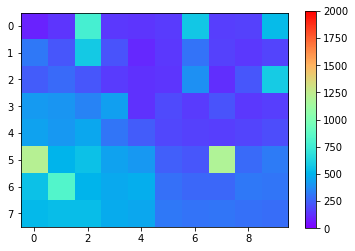

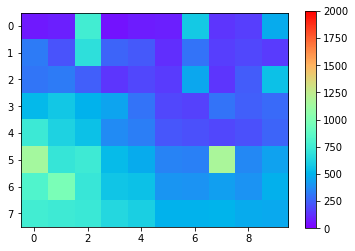

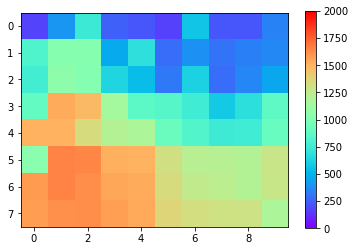

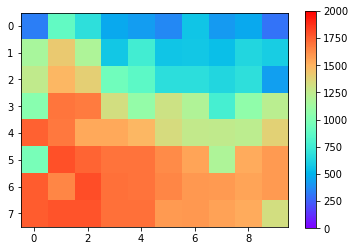

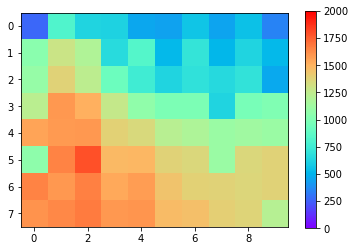

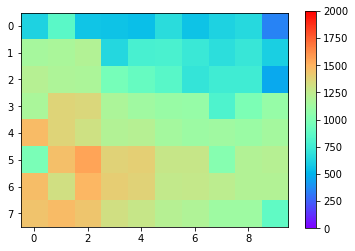

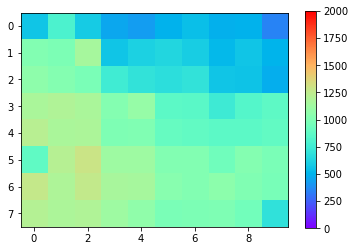

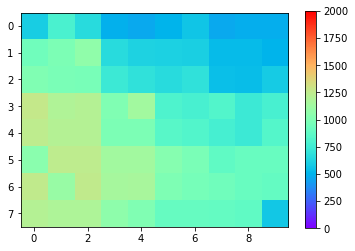

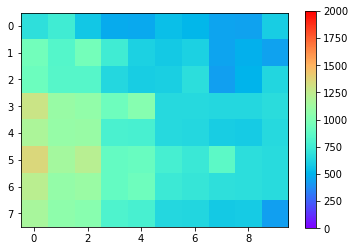

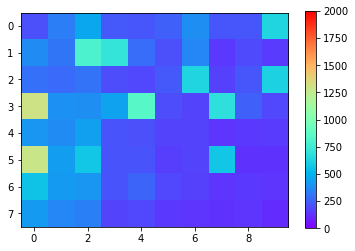

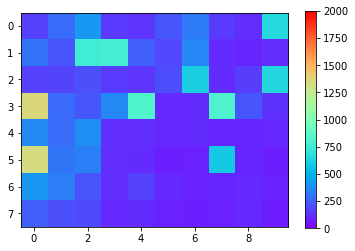

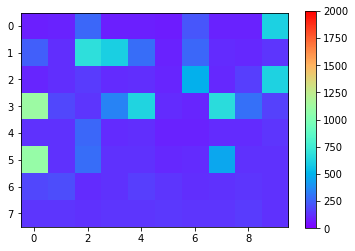

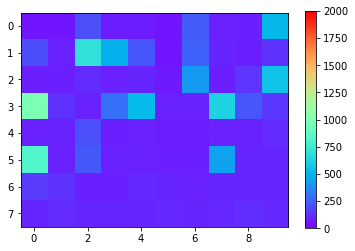

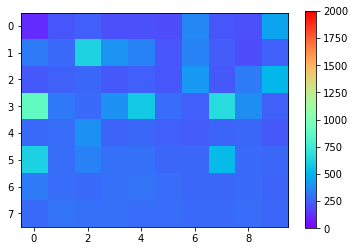

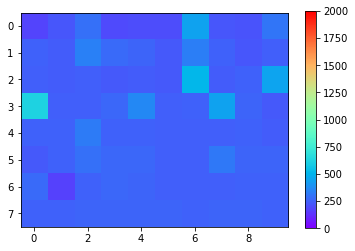

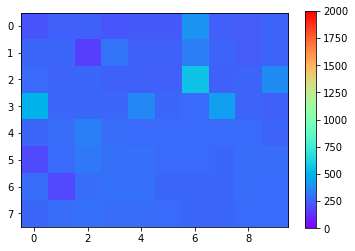

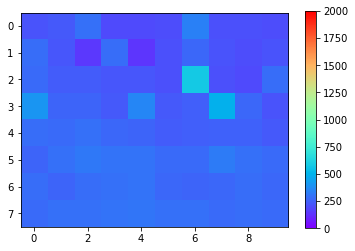

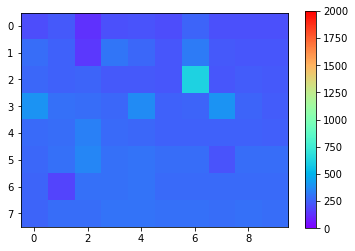

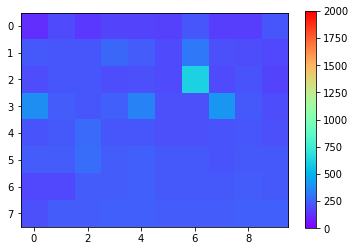

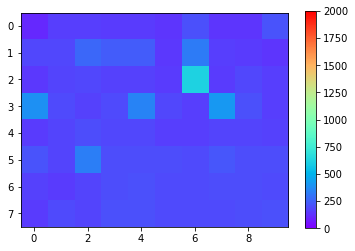

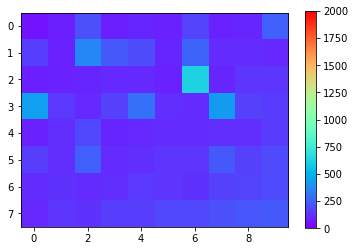

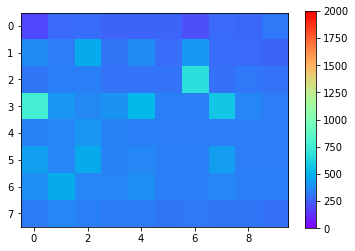

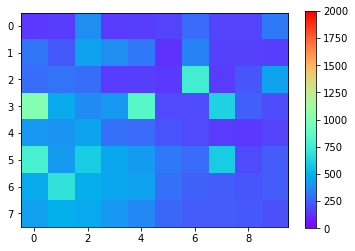

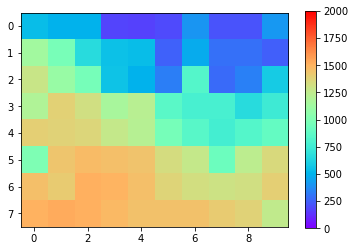

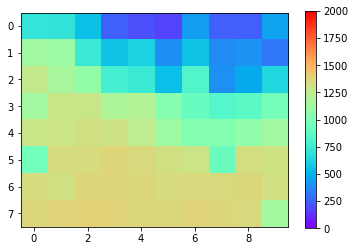

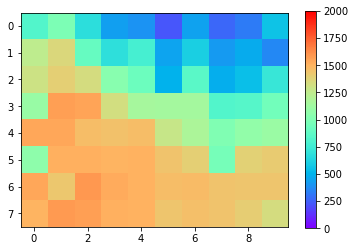

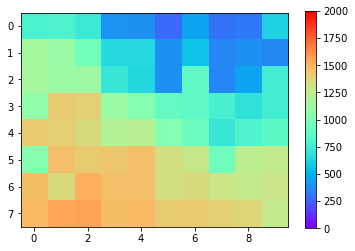

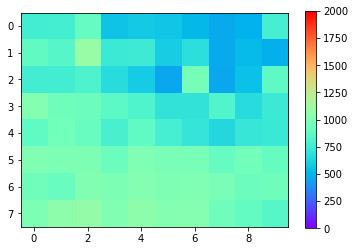

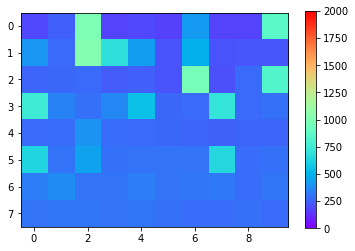

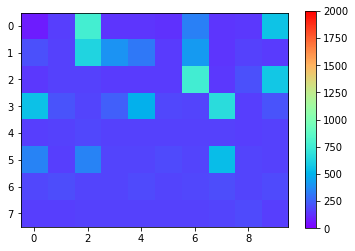

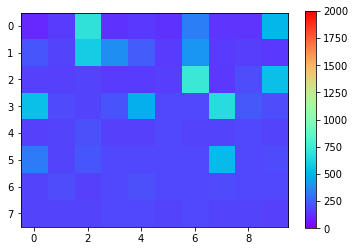

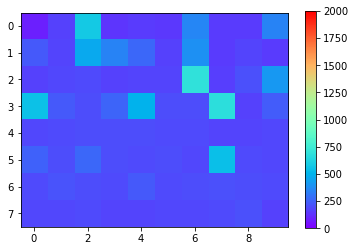

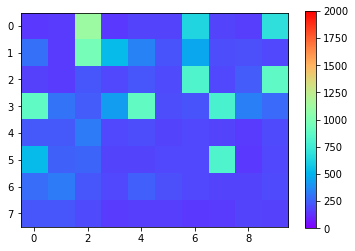

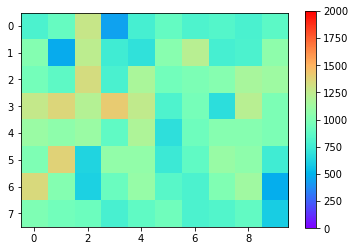

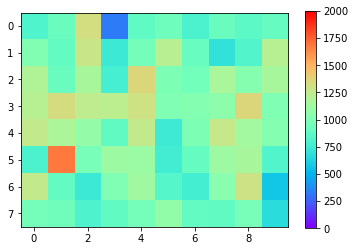

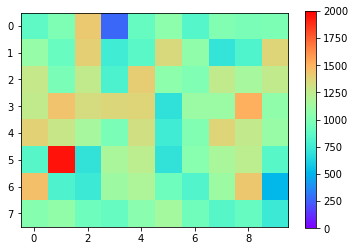

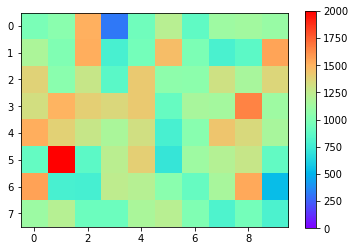

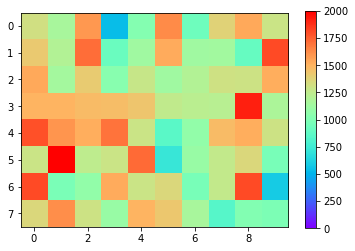

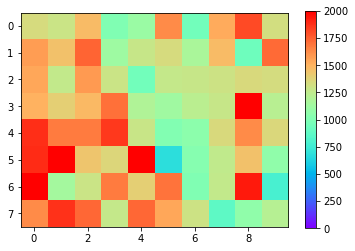

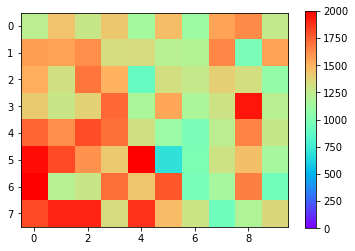

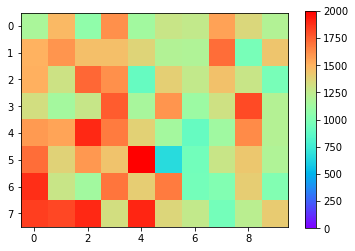

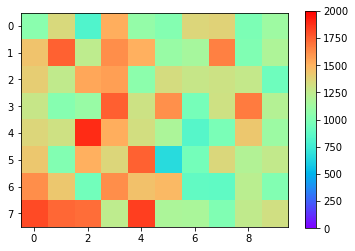

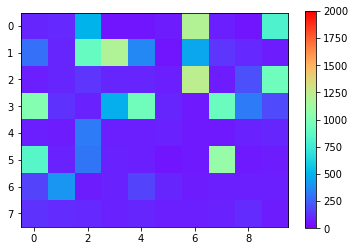

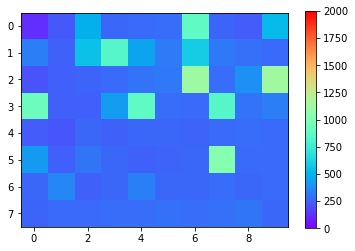

In [ ]:
for n in range(S2_VWC_recovered_array_image.shape[2]):
    rgb_img_test = S2_VWC_recovered_array_image[:,:,n]
    plt.imshow(rgb_img_test,cmap='rainbow', interpolation='nearest',vmin=0, vmax=2000)
    plt.colorbar()
    plt.show()